### Import required library

In [1]:
import numpy as np
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup

import time

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import sidetable

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

### Extract data get url

In [2]:
URL = 'https://www.magicbricks.com/independent-house-for-sale-in-hyderabad-pppfs'

In [3]:
page = requests.get(URL)

In [4]:
page.status_code

200

'\n<!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="UTF-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>\nHouse for Sale in Hyderabad: 9115+ Independent House for Sale in Hyderabad\n</title>\n<link href="https://fonts.gstatic.com" rel="dns-prefetch">\n<link rel="preconnect" href="https://cdn.staticmb.com">\n<link rel="preconnect" href="https://img.staticmb.com">\n<link href="https://www.googletagmanager.com" rel="dns-prefetch">\n<link href="https://www.google-analytics.com" rel="dns-prefetch">\n<link rel="shortcut icon" href="https://cdn.staticmb.com/images/favicon.ico">\n<meta name="description" content="Find over 9115+ house for sale in Hyderabad at MagicBricks. Choose from 1-5 BHKs of new/old home/duplex, or independent house for sale in Hyderabad from ✓ Verified Listings ✓ Real Photos ✓ Locality Info ✓ Maps.\r\n">\n<link rel="preload" as="image" href="https://img.staticmb.com/
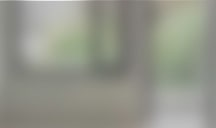
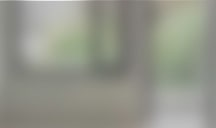

In [5]:
page.text

In [6]:
pagecontent = page.text

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>
House for Sale in Hyderabad: 9115+ Independent House for Sale in Hyderabad
</title>
<link href="https://fonts.gstatic.com" rel="dns-prefetch"/>
<link href="https://cdn.staticmb.com" rel="preconnect"/>
<link href="https://img.staticmb.com" rel="preconnect"/>
<link href="https://www.googletagmanager.com" rel="dns-prefetch"/>
<link href="https://www.google-analytics.com" rel="dns-prefetch"/>
<link href="https://cdn.staticmb.com/images/favicon.ico" rel="shortcut icon"/>
<meta content="Find over 9115+ house for sale in Hyderabad at MagicBricks. Choose from 1-5 BHKs of new/old home/duplex, or independent house for sale in Hyderabad from ✓ Verified Listings ✓ Real Photos ✓ Locality Info ✓ Maps.
" name="description"/>
<link as="image" fetchpriority="high" href="https://img.staticmb.com/mbpho
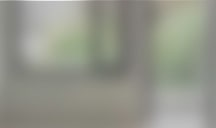
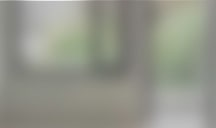

In [7]:
soup = BeautifulSoup(pagecontent)
soup

In [8]:
soup.find_all('div', attrs={'class':"mb-srp__card"})

[<div class="mb-srp__card"><div class="mb-srp__card__container"><div class="mb-srp__card__photo"><div class="mb-srp__card__photo__fig"><span class="mb-srp__card__photo__fig--count">11<span class="sign-plus">+</span></span><img alt="Buy  3 BHK  House for Sale in  Suchitra Road   Hyderabad" class="mb-srp__card__photo__fig--graphic" decoding="async" height="100%" src="https://img.staticmb.com/mbphoto/property/cropped_images/2023/Aug/06/Photo_h300_w450/62538927_6_MG20230806WA0007_300_450.jpg" title="Buy  3 BHK  House for Sale in  Suchitra Road   Hyderabad" width="100%"/><div class="mb-srp__card__photo__fig--post">Updated today</div></div><div class="mb-srp__card__ads"><div class="mb-srp__card__ads--name">Owner: Viswanath</div></div></div><div class="mb-srp__card__info mb-srp__card__info-withoutburger"><h2 class="mb-srp__card--title" title="3 BHK Independent House for Sale in  Suchitra Road, Hyderabad">3 BHK Independent House for Sale in Suchitra Road, Hyderabad</h2><div class="mb-srp__card

In [9]:
x = soup.find('div', attrs={'class':"mb-srp__card"})

In [10]:
x.text

'11+Updated todayOwner: Viswanath3 BHK Independent House for Sale in Suchitra Road, HyderabadSuper Area2255 sqftStatusReady to MoveFloorGround out of 2TransactionResaleFurnishingUnfurnishedfacingEastoverlookingMain RoadOwnershipFreeholdBathroom3Balcony2East Facing Property2255 sft Modern G 1 duplex on 140 yds East facing plot. Living Dining atrium, high quality construction. 2 km Suchitra,quite private colony hugs military dairy farm green lungspace. 1 balcony and 2nd floor Trestle on terrace for private rooftop garden. Brand New construction ready to move in.₹1.90 Cr ₹8426 per sqft Contact Owner Get Phone No. '

In [11]:
for x  in soup.find_all('div', attrs={'class':"mb-srp__card"}):
    print(x.text)

11+Updated todayOwner: Viswanath3 BHK Independent House for Sale in Suchitra Road, HyderabadSuper Area2255 sqftStatusReady to MoveFloorGround out of 2TransactionResaleFurnishingUnfurnishedfacingEastoverlookingMain RoadOwnershipFreeholdBathroom3Balcony2East Facing Property2255 sft Modern G 1 duplex on 140 yds East facing plot. Living Dining atrium, high quality construction. 2 km Suchitra,quite private colony hugs military dairy farm green lungspace. 1 balcony and 2nd floor Trestle on terrace for private rooftop garden. Brand New construction ready to move in.₹1.90 Cr ₹8426 per sqft Contact Owner Get Phone No. 
2+Updated todayOwner: Asha3 BHK Independent House for Sale in Kollur, Outer Ring Road, HyderabadCarpet Area5000 sqftStatusReady to MoveTransactionResaleFurnishingFurnishedfacingSouth - EastoverlookingMain RoadOwnershipFreeholdBathroom3Balcony1House is available for sale. It has covered area of 5000 sq-ft, it is a good location property. Please contact for more details. Have a loo

In [12]:
for x  in soup.find_all('div', attrs={'class':"mb-srp__card"}):
        owner = x.find('div', attrs={'class':"mb-srp__card__ads"})
        print(owner.text)
        
        
        title = x.find('h2',attrs={'class':"mb-srp__card--title"})
        print(title.text)
        
        details = x.find('div',attrs={'class':"mb-srp__card__summary"})
        print(details.text)
        
        price = x.find('div',attrs={'class':"mb-srp__card__price"})
        print(price.text)
        
        area = x.find('div',attrs={'class':"mb-srp__card__summary--value"})
        print(area.text)

Owner: Viswanath
3 BHK Independent House for Sale in Suchitra Road, Hyderabad
Super Area2255 sqftStatusReady to MoveFloorGround out of 2TransactionResaleFurnishingUnfurnishedfacingEastoverlookingMain RoadOwnershipFreeholdBathroom3Balcony2
₹1.90 Cr ₹8426 per sqft 
2255 sqft
Owner: Asha
3 BHK Independent House for Sale in Kollur, Outer Ring Road, Hyderabad
Carpet Area5000 sqftStatusReady to MoveTransactionResaleFurnishingFurnishedfacingSouth - EastoverlookingMain RoadOwnershipFreeholdBathroom3Balcony1
₹10 Cr 
5000 sqft
Owner: shaffi
1 BHK Independent House for Sale in Madhapur, Hyderabad
Carpet Area230 sqyrdStatusReady to MoveFloorGround out of 1TransactionResaleFurnishingUnfurnishedfacingNorthoverlookingMain RoadOwnershipFreeholdBathroom3
₹1.75 Cr ₹7716 per sqft 
230 sqyrd
Owner: Jonnadaanand Kumar
2 BHK Independent House for Sale in Bapu Nagar Quthbullapur, Hyderabad
Carpet Area600 sqftStatusReady to MoveFloorGround out of 1TransactionResaleFurnishingUnfurnishedfacingEastoverlookingMai

In [13]:
owners =[]
titles = []
details= []
prices=[]
areas=[]

for i in range(1,8):
    start_time = time.time()
    URL = 'https://www.magicbricks.com/independent-house-for-sale-in-hyderabad-pppfs?page={}'.format(i)
    pagecontent = requests.get(URL).text
    soup = BeautifulSoup(pagecontent)
    
    
    for x  in soup.find_all('div', attrs={'class':"mb-srp__card"}):
        owner = x.find('div', attrs={'class':"mb-srp__card__ads"})
        if owner is None:
            owners.append(np.NaN)
        else:
            owners.append(owner.text)
        
        
        title = x.find('h2', attrs={'class':"mb-srp__card--title"})
        if title is None:
            titles.append(np.NaN)
        else:
            titles.append(title.text)
        
          
        detail = x.find('div',attrs={'class':"mb-srp__card__summary"})
        if detail is None:
            details.append(np.NaN)
        else:
            details.append(detail.text)
        
        
        price = x.find('div',attrs={'class':"mb-srp__card__price"})
        if price is None:
            prices.append(np.NaN)
        else:
            prices.append(price.text)
            
            
        area = x.find('div',attrs={'class':"mb-srp__card__summary--value"})
        if area is None:
            areas.append(np.NaN)
        else:
            areas.append(area.text)
      
        
    end_time = time.time()
    print('Page {} completed in {} seconds'. format(i, end_time-start_time))

Page 1 completed in 1.9169740676879883 seconds
Page 2 completed in 2.008632183074951 seconds
Page 3 completed in 2.3033857345581055 seconds
Page 4 completed in 2.2758171558380127 seconds
Page 5 completed in 1.6678171157836914 seconds
Page 6 completed in 1.6846492290496826 seconds
Page 7 completed in 1.741661548614502 seconds


In [14]:
magicbricks_df = pd.DataFrame({'Owner':owners, 'Titles':titles, 'Details':details,'Price':prices,'Area':areas})

In [15]:
magicbricks_df

,Owner,Titles,Details,Price,Area
0,Owner: Viswanath,3 BHK Independent House for Sale in Suchitra R...,Super Area2255 sqftStatusReady to MoveFloorGro...,₹1.90 Cr ₹8426 per sqft,2255 sqft
1,Owner: Asha,"3 BHK Independent House for Sale in Kollur, Ou...",Carpet Area5000 sqftStatusReady to MoveTransac...,₹10 Cr,5000 sqft
2,Owner: shaffi,"1 BHK Independent House for Sale in Madhapur, ...",Carpet Area230 sqyrdStatusReady to MoveFloorGr...,₹1.75 Cr ₹7716 per sqft,230 sqyrd
3,Owner: Jonnadaanand Kumar,2 BHK Independent House for Sale in Bapu Nagar...,Carpet Area600 sqftStatusReady to MoveFloorGro...,₹62.5 Lac ₹9191 per sqft,600 sqft
4,Owner: Babu,3 BHK Independent House for Sale in Golf Pride...,Carpet Area3600 sqftStatusReady to MoveTransac...,₹3.55 Cr ₹9861 per sqft,3600 sqft
...,...,...,...,...,...
205,Owner: Rambabu,"5 BHK Independent House for Sale in Kompally, ...",Carpet Area3500 sqftStatusReady to MoveFloor3 ...,₹2.20 Cr ₹5366 per sqft,3500 sqft
206,Owner: gvk gvkumar,5 BHK Independent House for Sale in Sri Krishn...,Carpet Area4500 sqftStatusReady to MoveFloor2 ...,₹1.50 Cr ₹3000 per sqft,4500 sqft
207,Owner: Raja reddy,5 BHK Independent House for Sale in Spring Woo...,Carpet Area3335 sqftStatusReady to MoveTransac...,₹4 Cr ₹11923 per sqft,3335 sqft
208,Owner: Syed Zainlabuddin,8 BHK Independent House for Sale in Shamshabad...,Super Area5000 sqftStatusReady to MoveTransact...,₹1.80 Cr ₹3600 per sqft,5000 sqft


In [16]:
magicbricks_df['Owner'] = magicbricks_df['Owner'].apply(lambda x: str(x.replace('Owner:','')))

In [17]:
magicbricks_df.head()

,Owner,Titles,Details,Price,Area
0,Viswanath,3 BHK Independent House for Sale in Suchitra R...,Super Area2255 sqftStatusReady to MoveFloorGro...,₹1.90 Cr ₹8426 per sqft,2255 sqft
1,Asha,"3 BHK Independent House for Sale in Kollur, Ou...",Carpet Area5000 sqftStatusReady to MoveTransac...,₹10 Cr,5000 sqft
2,shaffi,"1 BHK Independent House for Sale in Madhapur, ...",Carpet Area230 sqyrdStatusReady to MoveFloorGr...,₹1.75 Cr ₹7716 per sqft,230 sqyrd
3,Jonnadaanand Kumar,2 BHK Independent House for Sale in Bapu Nagar...,Carpet Area600 sqftStatusReady to MoveFloorGro...,₹62.5 Lac ₹9191 per sqft,600 sqft
4,Babu,3 BHK Independent House for Sale in Golf Pride...,Carpet Area3600 sqftStatusReady to MoveTransac...,₹3.55 Cr ₹9861 per sqft,3600 sqft


In [18]:
magicbricks_df.Titles[4]
magicbricks_df.Titles[50]

'3 BHK Independent House for Sale in Golf Pride Homes, Secunderabad, Hyderabad'

'5 BHK Independent House for Sale in Pocharam, NH 2 2, Hyderabad'

In [19]:
myregex = re.compile(r'[0-9]\sBHK')
myregex.findall(magicbricks_df.Titles[50])

['5 BHK']

In [20]:
pattern = r'[0-9]\sBHK'
magicbricks_df.Titles.apply(lambda i: re.compile(pattern).findall(i))

0      [3 BHK]
1      [3 BHK]
2      [1 BHK]
3      [2 BHK]
4      [3 BHK]
        ...   
205    [5 BHK]
206    [5 BHK]
207    [5 BHK]
208    [8 BHK]
209    [3 BHK]
Name: Titles, Length: 210, dtype: object

In [21]:
pattern = r'[0-9]\sBHK'
magicbricks_df['BHK'] = magicbricks_df.Titles.apply(lambda i: re.compile(pattern).findall(i))

In [22]:
magicbricks_df.head()

,Owner,Titles,Details,Price,Area,BHK
0,Viswanath,3 BHK Independent House for Sale in Suchitra R...,Super Area2255 sqftStatusReady to MoveFloorGro...,₹1.90 Cr ₹8426 per sqft,2255 sqft,[3 BHK]
1,Asha,"3 BHK Independent House for Sale in Kollur, Ou...",Carpet Area5000 sqftStatusReady to MoveTransac...,₹10 Cr,5000 sqft,[3 BHK]
2,shaffi,"1 BHK Independent House for Sale in Madhapur, ...",Carpet Area230 sqyrdStatusReady to MoveFloorGr...,₹1.75 Cr ₹7716 per sqft,230 sqyrd,[1 BHK]
3,Jonnadaanand Kumar,2 BHK Independent House for Sale in Bapu Nagar...,Carpet Area600 sqftStatusReady to MoveFloorGro...,₹62.5 Lac ₹9191 per sqft,600 sqft,[2 BHK]
4,Babu,3 BHK Independent House for Sale in Golf Pride...,Carpet Area3600 sqftStatusReady to MoveTransac...,₹3.55 Cr ₹9861 per sqft,3600 sqft,[3 BHK]


In [23]:
magicbricks_df.Titles[4]

'3 BHK Independent House for Sale in Golf Pride Homes, Secunderabad, Hyderabad'

In [24]:
myregex = re.compile(r'\bin [A-Za-z\s]+')
myregex.findall(magicbricks_df.Titles[50])

['in Pocharam']

In [25]:
pattern = r'\bin [A-Za-z\s]+'
magicbricks_df.Titles.apply(lambda i: re.compile(pattern).findall(i))

0                     [in Suchitra Road]
1                            [in Kollur]
2                          [in Madhapur]
3           [in Bapu Nagar Quthbullapur]
4                  [in Golf Pride Homes]
                     ...                
205                        [in Kompally]
206    [in Sri Krishna Nagar Yousufguda]
207                    [in Spring Woods]
208                      [in Shamshabad]
209                   [in Kongara Kalan]
Name: Titles, Length: 210, dtype: object

In [26]:
pattern = r'\bin [A-Za-z\s]+'
magicbricks_df['Address'] = magicbricks_df.Titles.apply(lambda i: re.compile(pattern).findall(i))

In [27]:
magicbricks_df

,Owner,Titles,Details,Price,Area,BHK,Address
0,Viswanath,3 BHK Independent House for Sale in Suchitra R...,Super Area2255 sqftStatusReady to MoveFloorGro...,₹1.90 Cr ₹8426 per sqft,2255 sqft,[3 BHK],[in Suchitra Road]
1,Asha,"3 BHK Independent House for Sale in Kollur, Ou...",Carpet Area5000 sqftStatusReady to MoveTransac...,₹10 Cr,5000 sqft,[3 BHK],[in Kollur]
2,shaffi,"1 BHK Independent House for Sale in Madhapur, ...",Carpet Area230 sqyrdStatusReady to MoveFloorGr...,₹1.75 Cr ₹7716 per sqft,230 sqyrd,[1 BHK],[in Madhapur]
3,Jonnadaanand Kumar,2 BHK Independent House for Sale in Bapu Nagar...,Carpet Area600 sqftStatusReady to MoveFloorGro...,₹62.5 Lac ₹9191 per sqft,600 sqft,[2 BHK],[in Bapu Nagar Quthbullapur]
4,Babu,3 BHK Independent House for Sale in Golf Pride...,Carpet Area3600 sqftStatusReady to MoveTransac...,₹3.55 Cr ₹9861 per sqft,3600 sqft,[3 BHK],[in Golf Pride Homes]
...,...,...,...,...,...,...,...
205,Rambabu,"5 BHK Independent House for Sale in Kompally, ...",Carpet Area3500 sqftStatusReady to MoveFloor3 ...,₹2.20 Cr ₹5366 per sqft,3500 sqft,[5 BHK],[in Kompally]
206,gvk gvkumar,5 BHK Independent House for Sale in Sri Krishn...,Carpet Area4500 sqftStatusReady to MoveFloor2 ...,₹1.50 Cr ₹3000 per sqft,4500 sqft,[5 BHK],[in Sri Krishna Nagar Yousufguda]
207,Raja reddy,5 BHK Independent House for Sale in Spring Woo...,Carpet Area3335 sqftStatusReady to MoveTransac...,₹4 Cr ₹11923 per sqft,3335 sqft,[5 BHK],[in Spring Woods]
208,Syed Zainlabuddin,8 BHK Independent House for Sale in Shamshabad...,Super Area5000 sqftStatusReady to MoveTransact...,₹1.80 Cr ₹3600 per sqft,5000 sqft,[8 BHK],[in Shamshabad]


In [28]:
magicbricks_df.Price[0]

'₹1.90 Cr ₹8426 per sqft '

In [29]:
myregex = re.compile(r'^₹[0-9\.\s]+\w+')
myregex.findall(magicbricks_df.Price[3])

['₹62.5 Lac']

In [30]:
pattern = r'^₹[0-9\.\s]+\w+'
magicbricks_df.Price.apply(lambda i: re.compile(pattern).findall(i))

0       [₹1.90 Cr]
1         [₹10 Cr]
2       [₹1.75 Cr]
3      [₹62.5 Lac]
4       [₹3.55 Cr]
          ...     
205     [₹2.20 Cr]
206     [₹1.50 Cr]
207        [₹4 Cr]
208     [₹1.80 Cr]
209     [₹1.50 Cr]
Name: Price, Length: 210, dtype: object

In [31]:
pattern = r'^₹[0-9\.\s]+\w+'
magicbricks_df['Prices'] = magicbricks_df.Price.apply(lambda i: re.compile(pattern).findall(i))

In [32]:
magicbricks_df

,Owner,Titles,Details,Price,Area,BHK,Address,Prices
0,Viswanath,3 BHK Independent House for Sale in Suchitra R...,Super Area2255 sqftStatusReady to MoveFloorGro...,₹1.90 Cr ₹8426 per sqft,2255 sqft,[3 BHK],[in Suchitra Road],[₹1.90 Cr]
1,Asha,"3 BHK Independent House for Sale in Kollur, Ou...",Carpet Area5000 sqftStatusReady to MoveTransac...,₹10 Cr,5000 sqft,[3 BHK],[in Kollur],[₹10 Cr]
2,shaffi,"1 BHK Independent House for Sale in Madhapur, ...",Carpet Area230 sqyrdStatusReady to MoveFloorGr...,₹1.75 Cr ₹7716 per sqft,230 sqyrd,[1 BHK],[in Madhapur],[₹1.75 Cr]
3,Jonnadaanand Kumar,2 BHK Independent House for Sale in Bapu Nagar...,Carpet Area600 sqftStatusReady to MoveFloorGro...,₹62.5 Lac ₹9191 per sqft,600 sqft,[2 BHK],[in Bapu Nagar Quthbullapur],[₹62.5 Lac]
4,Babu,3 BHK Independent House for Sale in Golf Pride...,Carpet Area3600 sqftStatusReady to MoveTransac...,₹3.55 Cr ₹9861 per sqft,3600 sqft,[3 BHK],[in Golf Pride Homes],[₹3.55 Cr]
...,...,...,...,...,...,...,...,...
205,Rambabu,"5 BHK Independent House for Sale in Kompally, ...",Carpet Area3500 sqftStatusReady to MoveFloor3 ...,₹2.20 Cr ₹5366 per sqft,3500 sqft,[5 BHK],[in Kompally],[₹2.20 Cr]
206,gvk gvkumar,5 BHK Independent House for Sale in Sri Krishn...,Carpet Area4500 sqftStatusReady to MoveFloor2 ...,₹1.50 Cr ₹3000 per sqft,4500 sqft,[5 BHK],[in Sri Krishna Nagar Yousufguda],[₹1.50 Cr]
207,Raja reddy,5 BHK Independent House for Sale in Spring Woo...,Carpet Area3335 sqftStatusReady to MoveTransac...,₹4 Cr ₹11923 per sqft,3335 sqft,[5 BHK],[in Spring Woods],[₹4 Cr]
208,Syed Zainlabuddin,8 BHK Independent House for Sale in Shamshabad...,Super Area5000 sqftStatusReady to MoveTransact...,₹1.80 Cr ₹3600 per sqft,5000 sqft,[8 BHK],[in Shamshabad],[₹1.80 Cr]


In [33]:
myregex = re.compile(r'₹[0-9\s]+\w+ sqft')
myregex.findall(magicbricks_df.Price[200])

['₹7400 per sqft']

In [34]:
pattern = r'₹[0-9\s]+\w+ sqft'
magicbricks_df.Price.apply(lambda i: re.compile(pattern).findall(i))

0       [₹8426 per sqft]
1                     []
2       [₹7716 per sqft]
3       [₹9191 per sqft]
4       [₹9861 per sqft]
             ...        
205     [₹5366 per sqft]
206     [₹3000 per sqft]
207    [₹11923 per sqft]
208     [₹3600 per sqft]
209     [₹5172 per sqft]
Name: Price, Length: 210, dtype: object

In [35]:
pattern = r'₹[0-9\s]+\w+ sqft'
magicbricks_df['Price_per_sqft'] = magicbricks_df.Price.apply(lambda i: re.compile(pattern).findall(i))

In [36]:
magicbricks_df

,Owner,Titles,Details,Price,Area,BHK,Address,Prices,Price_per_sqft
0,Viswanath,3 BHK Independent House for Sale in Suchitra R...,Super Area2255 sqftStatusReady to MoveFloorGro...,₹1.90 Cr ₹8426 per sqft,2255 sqft,[3 BHK],[in Suchitra Road],[₹1.90 Cr],[₹8426 per sqft]
1,Asha,"3 BHK Independent House for Sale in Kollur, Ou...",Carpet Area5000 sqftStatusReady to MoveTransac...,₹10 Cr,5000 sqft,[3 BHK],[in Kollur],[₹10 Cr],[]
2,shaffi,"1 BHK Independent House for Sale in Madhapur, ...",Carpet Area230 sqyrdStatusReady to MoveFloorGr...,₹1.75 Cr ₹7716 per sqft,230 sqyrd,[1 BHK],[in Madhapur],[₹1.75 Cr],[₹7716 per sqft]
3,Jonnadaanand Kumar,2 BHK Independent House for Sale in Bapu Nagar...,Carpet Area600 sqftStatusReady to MoveFloorGro...,₹62.5 Lac ₹9191 per sqft,600 sqft,[2 BHK],[in Bapu Nagar Quthbullapur],[₹62.5 Lac],[₹9191 per sqft]
4,Babu,3 BHK Independent House for Sale in Golf Pride...,Carpet Area3600 sqftStatusReady to MoveTransac...,₹3.55 Cr ₹9861 per sqft,3600 sqft,[3 BHK],[in Golf Pride Homes],[₹3.55 Cr],[₹9861 per sqft]
...,...,...,...,...,...,...,...,...,...
205,Rambabu,"5 BHK Independent House for Sale in Kompally, ...",Carpet Area3500 sqftStatusReady to MoveFloor3 ...,₹2.20 Cr ₹5366 per sqft,3500 sqft,[5 BHK],[in Kompally],[₹2.20 Cr],[₹5366 per sqft]
206,gvk gvkumar,5 BHK Independent House for Sale in Sri Krishn...,Carpet Area4500 sqftStatusReady to MoveFloor2 ...,₹1.50 Cr ₹3000 per sqft,4500 sqft,[5 BHK],[in Sri Krishna Nagar Yousufguda],[₹1.50 Cr],[₹3000 per sqft]
207,Raja reddy,5 BHK Independent House for Sale in Spring Woo...,Carpet Area3335 sqftStatusReady to MoveTransac...,₹4 Cr ₹11923 per sqft,3335 sqft,[5 BHK],[in Spring Woods],[₹4 Cr],[₹11923 per sqft]
208,Syed Zainlabuddin,8 BHK Independent House for Sale in Shamshabad...,Super Area5000 sqftStatusReady to MoveTransact...,₹1.80 Cr ₹3600 per sqft,5000 sqft,[8 BHK],[in Shamshabad],[₹1.80 Cr],[₹3600 per sqft]


In [37]:
magicbricks_df.Details[4]

'Carpet Area3600 sqftStatusReady to MoveTransactionResaleFurnishingSemi-FurnishedfacingEastoverlookingGarden/ParkOwnershipFreeholdBathroom5Balcony1'

In [38]:
myregex = re.compile(r'^[A-Za-z\s]+')
myregex.findall(magicbricks_df.Details[200])

['Carpet Area']

In [39]:
pattern = r'^[A-Za-z\s]+'
magicbricks_df.Details.apply(lambda i: re.compile(pattern).findall(i))

0       [Super Area]
1      [Carpet Area]
2      [Carpet Area]
3      [Carpet Area]
4      [Carpet Area]
           ...      
205    [Carpet Area]
206    [Carpet Area]
207    [Carpet Area]
208     [Super Area]
209    [Carpet Area]
Name: Details, Length: 210, dtype: object

In [40]:
pattern = r'^[A-Za-z\s]+'
magicbricks_df['Area_details'] = magicbricks_df.Details.apply(lambda i: re.compile(pattern).findall(i))

In [41]:
magicbricks_df

,Owner,Titles,Details,Price,Area,BHK,Address,Prices,Price_per_sqft,Area_details
0,Viswanath,3 BHK Independent House for Sale in Suchitra R...,Super Area2255 sqftStatusReady to MoveFloorGro...,₹1.90 Cr ₹8426 per sqft,2255 sqft,[3 BHK],[in Suchitra Road],[₹1.90 Cr],[₹8426 per sqft],[Super Area]
1,Asha,"3 BHK Independent House for Sale in Kollur, Ou...",Carpet Area5000 sqftStatusReady to MoveTransac...,₹10 Cr,5000 sqft,[3 BHK],[in Kollur],[₹10 Cr],[],[Carpet Area]
2,shaffi,"1 BHK Independent House for Sale in Madhapur, ...",Carpet Area230 sqyrdStatusReady to MoveFloorGr...,₹1.75 Cr ₹7716 per sqft,230 sqyrd,[1 BHK],[in Madhapur],[₹1.75 Cr],[₹7716 per sqft],[Carpet Area]
3,Jonnadaanand Kumar,2 BHK Independent House for Sale in Bapu Nagar...,Carpet Area600 sqftStatusReady to MoveFloorGro...,₹62.5 Lac ₹9191 per sqft,600 sqft,[2 BHK],[in Bapu Nagar Quthbullapur],[₹62.5 Lac],[₹9191 per sqft],[Carpet Area]
4,Babu,3 BHK Independent House for Sale in Golf Pride...,Carpet Area3600 sqftStatusReady to MoveTransac...,₹3.55 Cr ₹9861 per sqft,3600 sqft,[3 BHK],[in Golf Pride Homes],[₹3.55 Cr],[₹9861 per sqft],[Carpet Area]
...,...,...,...,...,...,...,...,...,...,...
205,Rambabu,"5 BHK Independent House for Sale in Kompally, ...",Carpet Area3500 sqftStatusReady to MoveFloor3 ...,₹2.20 Cr ₹5366 per sqft,3500 sqft,[5 BHK],[in Kompally],[₹2.20 Cr],[₹5366 per sqft],[Carpet Area]
206,gvk gvkumar,5 BHK Independent House for Sale in Sri Krishn...,Carpet Area4500 sqftStatusReady to MoveFloor2 ...,₹1.50 Cr ₹3000 per sqft,4500 sqft,[5 BHK],[in Sri Krishna Nagar Yousufguda],[₹1.50 Cr],[₹3000 per sqft],[Carpet Area]
207,Raja reddy,5 BHK Independent House for Sale in Spring Woo...,Carpet Area3335 sqftStatusReady to MoveTransac...,₹4 Cr ₹11923 per sqft,3335 sqft,[5 BHK],[in Spring Woods],[₹4 Cr],[₹11923 per sqft],[Carpet Area]
208,Syed Zainlabuddin,8 BHK Independent House for Sale in Shamshabad...,Super Area5000 sqftStatusReady to MoveTransact...,₹1.80 Cr ₹3600 per sqft,5000 sqft,[8 BHK],[in Shamshabad],[₹1.80 Cr],[₹3600 per sqft],[Super Area]


In [42]:
magicbricks_df.Details[8]

'Carpet Area1150 sqftStatusReady to MoveFloorGround out of 1TransactionResaleFurnishingUnfurnishedfacingEastoverlookingGarden/Park, Main RoadOwnershipFreeholdBathroom3Balcony2'

In [43]:
myregex = re.compile(r'Status[A-Za-z]+ \w+ Move')
myregex.findall(magicbricks_df.Details[8])

['StatusReady to Move']

In [44]:
pattern = r'Status[A-Za-z]+ \w+ Move'
magicbricks_df.Details.apply(lambda i: re.compile(pattern).findall(i))

0      [StatusReady to Move]
1      [StatusReady to Move]
2      [StatusReady to Move]
3      [StatusReady to Move]
4      [StatusReady to Move]
               ...          
205    [StatusReady to Move]
206    [StatusReady to Move]
207    [StatusReady to Move]
208    [StatusReady to Move]
209                       []
Name: Details, Length: 210, dtype: object

In [45]:
pattern = r'Status[A-Za-z]+ \w+ Move'
magicbricks_df['Status'] = magicbricks_df.Details.apply(lambda i: re.compile(pattern).findall(i))

In [46]:
magicbricks_df

,Owner,Titles,Details,Price,Area,BHK,Address,Prices,Price_per_sqft,Area_details,Status
0,Viswanath,3 BHK Independent House for Sale in Suchitra R...,Super Area2255 sqftStatusReady to MoveFloorGro...,₹1.90 Cr ₹8426 per sqft,2255 sqft,[3 BHK],[in Suchitra Road],[₹1.90 Cr],[₹8426 per sqft],[Super Area],[StatusReady to Move]
1,Asha,"3 BHK Independent House for Sale in Kollur, Ou...",Carpet Area5000 sqftStatusReady to MoveTransac...,₹10 Cr,5000 sqft,[3 BHK],[in Kollur],[₹10 Cr],[],[Carpet Area],[StatusReady to Move]
2,shaffi,"1 BHK Independent House for Sale in Madhapur, ...",Carpet Area230 sqyrdStatusReady to MoveFloorGr...,₹1.75 Cr ₹7716 per sqft,230 sqyrd,[1 BHK],[in Madhapur],[₹1.75 Cr],[₹7716 per sqft],[Carpet Area],[StatusReady to Move]
3,Jonnadaanand Kumar,2 BHK Independent House for Sale in Bapu Nagar...,Carpet Area600 sqftStatusReady to MoveFloorGro...,₹62.5 Lac ₹9191 per sqft,600 sqft,[2 BHK],[in Bapu Nagar Quthbullapur],[₹62.5 Lac],[₹9191 per sqft],[Carpet Area],[StatusReady to Move]
4,Babu,3 BHK Independent House for Sale in Golf Pride...,Carpet Area3600 sqftStatusReady to MoveTransac...,₹3.55 Cr ₹9861 per sqft,3600 sqft,[3 BHK],[in Golf Pride Homes],[₹3.55 Cr],[₹9861 per sqft],[Carpet Area],[StatusReady to Move]
...,...,...,...,...,...,...,...,...,...,...,...
205,Rambabu,"5 BHK Independent House for Sale in Kompally, ...",Carpet Area3500 sqftStatusReady to MoveFloor3 ...,₹2.20 Cr ₹5366 per sqft,3500 sqft,[5 BHK],[in Kompally],[₹2.20 Cr],[₹5366 per sqft],[Carpet Area],[StatusReady to Move]
206,gvk gvkumar,5 BHK Independent House for Sale in Sri Krishn...,Carpet Area4500 sqftStatusReady to MoveFloor2 ...,₹1.50 Cr ₹3000 per sqft,4500 sqft,[5 BHK],[in Sri Krishna Nagar Yousufguda],[₹1.50 Cr],[₹3000 per sqft],[Carpet Area],[StatusReady to Move]
207,Raja reddy,5 BHK Independent House for Sale in Spring Woo...,Carpet Area3335 sqftStatusReady to MoveTransac...,₹4 Cr ₹11923 per sqft,3335 sqft,[5 BHK],[in Spring Woods],[₹4 Cr],[₹11923 per sqft],[Carpet Area],[StatusReady to Move]
208,Syed Zainlabuddin,8 BHK Independent House for Sale in Shamshabad...,Super Area5000 sqftStatusReady to MoveTransact...,₹1.80 Cr ₹3600 per sqft,5000 sqft,[8 BHK],[in Shamshabad],[₹1.80 Cr],[₹3600 per sqft],[Super Area],[StatusReady to Move]


In [47]:
magicbricks_df.columns

Index(['Owner', 'Titles', 'Details', 'Price', 'Area', 'BHK', 'Address',
       'Prices', 'Price_per_sqft', 'Area_details', 'Status'],
      dtype='object')

In [48]:
magicbricks_df_new = magicbricks_df[['Owner', 'Titles', 'Details', 'Price', 'Area', 'BHK', 'Address',
       'Prices', 'Price_per_sqft', 'Area_details', 'Status']]

In [49]:
magicbricks_df_new

,Owner,Titles,Details,Price,Area,BHK,Address,Prices,Price_per_sqft,Area_details,Status
0,Viswanath,3 BHK Independent House for Sale in Suchitra R...,Super Area2255 sqftStatusReady to MoveFloorGro...,₹1.90 Cr ₹8426 per sqft,2255 sqft,[3 BHK],[in Suchitra Road],[₹1.90 Cr],[₹8426 per sqft],[Super Area],[StatusReady to Move]
1,Asha,"3 BHK Independent House for Sale in Kollur, Ou...",Carpet Area5000 sqftStatusReady to MoveTransac...,₹10 Cr,5000 sqft,[3 BHK],[in Kollur],[₹10 Cr],[],[Carpet Area],[StatusReady to Move]
2,shaffi,"1 BHK Independent House for Sale in Madhapur, ...",Carpet Area230 sqyrdStatusReady to MoveFloorGr...,₹1.75 Cr ₹7716 per sqft,230 sqyrd,[1 BHK],[in Madhapur],[₹1.75 Cr],[₹7716 per sqft],[Carpet Area],[StatusReady to Move]
3,Jonnadaanand Kumar,2 BHK Independent House for Sale in Bapu Nagar...,Carpet Area600 sqftStatusReady to MoveFloorGro...,₹62.5 Lac ₹9191 per sqft,600 sqft,[2 BHK],[in Bapu Nagar Quthbullapur],[₹62.5 Lac],[₹9191 per sqft],[Carpet Area],[StatusReady to Move]
4,Babu,3 BHK Independent House for Sale in Golf Pride...,Carpet Area3600 sqftStatusReady to MoveTransac...,₹3.55 Cr ₹9861 per sqft,3600 sqft,[3 BHK],[in Golf Pride Homes],[₹3.55 Cr],[₹9861 per sqft],[Carpet Area],[StatusReady to Move]
...,...,...,...,...,...,...,...,...,...,...,...
205,Rambabu,"5 BHK Independent House for Sale in Kompally, ...",Carpet Area3500 sqftStatusReady to MoveFloor3 ...,₹2.20 Cr ₹5366 per sqft,3500 sqft,[5 BHK],[in Kompally],[₹2.20 Cr],[₹5366 per sqft],[Carpet Area],[StatusReady to Move]
206,gvk gvkumar,5 BHK Independent House for Sale in Sri Krishn...,Carpet Area4500 sqftStatusReady to MoveFloor2 ...,₹1.50 Cr ₹3000 per sqft,4500 sqft,[5 BHK],[in Sri Krishna Nagar Yousufguda],[₹1.50 Cr],[₹3000 per sqft],[Carpet Area],[StatusReady to Move]
207,Raja reddy,5 BHK Independent House for Sale in Spring Woo...,Carpet Area3335 sqftStatusReady to MoveTransac...,₹4 Cr ₹11923 per sqft,3335 sqft,[5 BHK],[in Spring Woods],[₹4 Cr],[₹11923 per sqft],[Carpet Area],[StatusReady to Move]
208,Syed Zainlabuddin,8 BHK Independent House for Sale in Shamshabad...,Super Area5000 sqftStatusReady to MoveTransact...,₹1.80 Cr ₹3600 per sqft,5000 sqft,[8 BHK],[in Shamshabad],[₹1.80 Cr],[₹3600 per sqft],[Super Area],[StatusReady to Move]


In [50]:
magicbricks_df_new.BHK.apply(lambda x : ''.join(x))
magicbricks_df_new.Address.apply(lambda x : ''.join(x))
magicbricks_df_new.Prices.apply(lambda x : ''.join(x))
magicbricks_df_new.Price_per_sqft.apply(lambda x : ''.join(x))
magicbricks_df_new.Area_details.apply(lambda x : ''.join(x))
magicbricks_df_new.Status.apply(lambda x : ''.join(x))

0      3 BHK
1      3 BHK
2      1 BHK
3      2 BHK
4      3 BHK
       ...  
205    5 BHK
206    5 BHK
207    5 BHK
208    8 BHK
209    3 BHK
Name: BHK, Length: 210, dtype: object

0                     in Suchitra Road
1                            in Kollur
2                          in Madhapur
3           in Bapu Nagar Quthbullapur
4                  in Golf Pride Homes
                    ...               
205                        in Kompally
206    in Sri Krishna Nagar Yousufguda
207                    in Spring Woods
208                      in Shamshabad
209                   in Kongara Kalan
Name: Address, Length: 210, dtype: object

0       ₹1.90 Cr
1         ₹10 Cr
2       ₹1.75 Cr
3      ₹62.5 Lac
4       ₹3.55 Cr
         ...    
205     ₹2.20 Cr
206     ₹1.50 Cr
207        ₹4 Cr
208     ₹1.80 Cr
209     ₹1.50 Cr
Name: Prices, Length: 210, dtype: object

0       ₹8426 per sqft
1                     
2       ₹7716 per sqft
3       ₹9191 per sqft
4       ₹9861 per sqft
            ...       
205     ₹5366 per sqft
206     ₹3000 per sqft
207    ₹11923 per sqft
208     ₹3600 per sqft
209     ₹5172 per sqft
Name: Price_per_sqft, Length: 210, dtype: object

0       Super Area
1      Carpet Area
2      Carpet Area
3      Carpet Area
4      Carpet Area
          ...     
205    Carpet Area
206    Carpet Area
207    Carpet Area
208     Super Area
209    Carpet Area
Name: Area_details, Length: 210, dtype: object

0      StatusReady to Move
1      StatusReady to Move
2      StatusReady to Move
3      StatusReady to Move
4      StatusReady to Move
              ...         
205    StatusReady to Move
206    StatusReady to Move
207    StatusReady to Move
208    StatusReady to Move
209                       
Name: Status, Length: 210, dtype: object

In [51]:
magicbricks_df_new.BHK = magicbricks_df_new.BHK.apply(lambda x : ''.join(x))
magicbricks_df_new.Address = magicbricks_df_new.Address.apply(lambda x : ''.join(x))
magicbricks_df_new.Prices = magicbricks_df_new.Prices.apply(lambda x : ''.join(x))
magicbricks_df_new.Price_per_sqft = magicbricks_df_new.Price_per_sqft.apply(lambda x : ''.join(x))
magicbricks_df_new.Area_details = magicbricks_df_new.Area_details.apply(lambda x : ''.join(x))
magicbricks_df_new.Status = magicbricks_df_new.Status.apply(lambda x : ''.join(x))

In [52]:
magicbricks_df_new

,Owner,Titles,Details,Price,Area,BHK,Address,Prices,Price_per_sqft,Area_details,Status
0,Viswanath,3 BHK Independent House for Sale in Suchitra R...,Super Area2255 sqftStatusReady to MoveFloorGro...,₹1.90 Cr ₹8426 per sqft,2255 sqft,3 BHK,in Suchitra Road,₹1.90 Cr,₹8426 per sqft,Super Area,StatusReady to Move
1,Asha,"3 BHK Independent House for Sale in Kollur, Ou...",Carpet Area5000 sqftStatusReady to MoveTransac...,₹10 Cr,5000 sqft,3 BHK,in Kollur,₹10 Cr,,Carpet Area,StatusReady to Move
2,shaffi,"1 BHK Independent House for Sale in Madhapur, ...",Carpet Area230 sqyrdStatusReady to MoveFloorGr...,₹1.75 Cr ₹7716 per sqft,230 sqyrd,1 BHK,in Madhapur,₹1.75 Cr,₹7716 per sqft,Carpet Area,StatusReady to Move
3,Jonnadaanand Kumar,2 BHK Independent House for Sale in Bapu Nagar...,Carpet Area600 sqftStatusReady to MoveFloorGro...,₹62.5 Lac ₹9191 per sqft,600 sqft,2 BHK,in Bapu Nagar Quthbullapur,₹62.5 Lac,₹9191 per sqft,Carpet Area,StatusReady to Move
4,Babu,3 BHK Independent House for Sale in Golf Pride...,Carpet Area3600 sqftStatusReady to MoveTransac...,₹3.55 Cr ₹9861 per sqft,3600 sqft,3 BHK,in Golf Pride Homes,₹3.55 Cr,₹9861 per sqft,Carpet Area,StatusReady to Move
...,...,...,...,...,...,...,...,...,...,...,...
205,Rambabu,"5 BHK Independent House for Sale in Kompally, ...",Carpet Area3500 sqftStatusReady to MoveFloor3 ...,₹2.20 Cr ₹5366 per sqft,3500 sqft,5 BHK,in Kompally,₹2.20 Cr,₹5366 per sqft,Carpet Area,StatusReady to Move
206,gvk gvkumar,5 BHK Independent House for Sale in Sri Krishn...,Carpet Area4500 sqftStatusReady to MoveFloor2 ...,₹1.50 Cr ₹3000 per sqft,4500 sqft,5 BHK,in Sri Krishna Nagar Yousufguda,₹1.50 Cr,₹3000 per sqft,Carpet Area,StatusReady to Move
207,Raja reddy,5 BHK Independent House for Sale in Spring Woo...,Carpet Area3335 sqftStatusReady to MoveTransac...,₹4 Cr ₹11923 per sqft,3335 sqft,5 BHK,in Spring Woods,₹4 Cr,₹11923 per sqft,Carpet Area,StatusReady to Move
208,Syed Zainlabuddin,8 BHK Independent House for Sale in Shamshabad...,Super Area5000 sqftStatusReady to MoveTransact...,₹1.80 Cr ₹3600 per sqft,5000 sqft,8 BHK,in Shamshabad,₹1.80 Cr,₹3600 per sqft,Super Area,StatusReady to Move


In [53]:
magicbricks_df_new['Owner']= magicbricks_df_new['Owner'].str.replace('Agent:','')

In [54]:
magicbricks_df_new['Owner']= magicbricks_df_new['Owner'].str.replace('Builder:','')

In [55]:
magicbricks_df_new['Address'] = magicbricks_df_new['Address'].str.replace('in','')

In [56]:
magicbricks_df_new['Prices'] = magicbricks_df_new['Prices'].str.replace('₹','')

In [57]:
magicbricks_df_new['Price_per_sqft'] = magicbricks_df_new['Price_per_sqft'].str.replace('₹','')

In [58]:
magicbricks_df_new['Price_per_sqft'] = magicbricks_df_new['Price_per_sqft'].str.replace('per sqft','')

In [59]:
magicbricks_df_new['BHK'] = magicbricks_df_new['BHK'].str.replace('BHK','')

In [60]:
magicbricks_df_new['Status'] = magicbricks_df_new['Status'].str.replace('Status','')

In [61]:
magicbricks_df_new

,Owner,Titles,Details,Price,Area,BHK,Address,Prices,Price_per_sqft,Area_details,Status
0,Viswanath,3 BHK Independent House for Sale in Suchitra R...,Super Area2255 sqftStatusReady to MoveFloorGro...,₹1.90 Cr ₹8426 per sqft,2255 sqft,3,Suchitra Road,1.90 Cr,8426,Super Area,Ready to Move
1,Asha,"3 BHK Independent House for Sale in Kollur, Ou...",Carpet Area5000 sqftStatusReady to MoveTransac...,₹10 Cr,5000 sqft,3,Kollur,10 Cr,,Carpet Area,Ready to Move
2,shaffi,"1 BHK Independent House for Sale in Madhapur, ...",Carpet Area230 sqyrdStatusReady to MoveFloorGr...,₹1.75 Cr ₹7716 per sqft,230 sqyrd,1,Madhapur,1.75 Cr,7716,Carpet Area,Ready to Move
3,Jonnadaanand Kumar,2 BHK Independent House for Sale in Bapu Nagar...,Carpet Area600 sqftStatusReady to MoveFloorGro...,₹62.5 Lac ₹9191 per sqft,600 sqft,2,Bapu Nagar Quthbullapur,62.5 Lac,9191,Carpet Area,Ready to Move
4,Babu,3 BHK Independent House for Sale in Golf Pride...,Carpet Area3600 sqftStatusReady to MoveTransac...,₹3.55 Cr ₹9861 per sqft,3600 sqft,3,Golf Pride Homes,3.55 Cr,9861,Carpet Area,Ready to Move
...,...,...,...,...,...,...,...,...,...,...,...
205,Rambabu,"5 BHK Independent House for Sale in Kompally, ...",Carpet Area3500 sqftStatusReady to MoveFloor3 ...,₹2.20 Cr ₹5366 per sqft,3500 sqft,5,Kompally,2.20 Cr,5366,Carpet Area,Ready to Move
206,gvk gvkumar,5 BHK Independent House for Sale in Sri Krishn...,Carpet Area4500 sqftStatusReady to MoveFloor2 ...,₹1.50 Cr ₹3000 per sqft,4500 sqft,5,Sri Krishna Nagar Yousufguda,1.50 Cr,3000,Carpet Area,Ready to Move
207,Raja reddy,5 BHK Independent House for Sale in Spring Woo...,Carpet Area3335 sqftStatusReady to MoveTransac...,₹4 Cr ₹11923 per sqft,3335 sqft,5,Sprg Woods,4 Cr,11923,Carpet Area,Ready to Move
208,Syed Zainlabuddin,8 BHK Independent House for Sale in Shamshabad...,Super Area5000 sqftStatusReady to MoveTransact...,₹1.80 Cr ₹3600 per sqft,5000 sqft,8,Shamshabad,1.80 Cr,3600,Super Area,Ready to Move


In [62]:
magicbricks_df_new.to_csv(r'C:\Users\Sumit\sumit personal projects\Magicbricks.csv')
magicbricks_df_new.to_excel(r'C:\Users\Sumit\sumit personal projects\Magicbricks.xlsx')

In [63]:
df = pd.read_csv(r'C:\Users\Sumit\sumit personal projects\Magicbricks.csv')

## Data Cleaning

In [64]:
df

,Unnamed: 0,Owner,Titles,Details,Price,Area,BHK,Address,Prices,Price_per_sqft,Area_details,Status
0,0,Viswanath,3 BHK Independent House for Sale in Suchitra R...,Super Area2255 sqftStatusReady to MoveFloorGro...,₹1.90 Cr ₹8426 per sqft,2255 sqft,3,Suchitra Road,1.90 Cr,8426.0,Super Area,Ready to Move
1,1,Asha,"3 BHK Independent House for Sale in Kollur, Ou...",Carpet Area5000 sqftStatusReady to MoveTransac...,₹10 Cr,5000 sqft,3,Kollur,10 Cr,NaN,Carpet Area,Ready to Move
2,2,shaffi,"1 BHK Independent House for Sale in Madhapur, ...",Carpet Area230 sqyrdStatusReady to MoveFloorGr...,₹1.75 Cr ₹7716 per sqft,230 sqyrd,1,Madhapur,1.75 Cr,7716.0,Carpet Area,Ready to Move
3,3,Jonnadaanand Kumar,2 BHK Independent House for Sale in Bapu Nagar...,Carpet Area600 sqftStatusReady to MoveFloorGro...,₹62.5 Lac ₹9191 per sqft,600 sqft,2,Bapu Nagar Quthbullapur,62.5 Lac,9191.0,Carpet Area,Ready to Move
4,4,Babu,3 BHK Independent House for Sale in Golf Pride...,Carpet Area3600 sqftStatusReady to MoveTransac...,₹3.55 Cr ₹9861 per sqft,3600 sqft,3,Golf Pride Homes,3.55 Cr,9861.0,Carpet Area,Ready to Move
...,...,...,...,...,...,...,...,...,...,...,...,...
205,205,Rambabu,"5 BHK Independent House for Sale in Kompally, ...",Carpet Area3500 sqftStatusReady to MoveFloor3 ...,₹2.20 Cr ₹5366 per sqft,3500 sqft,5,Kompally,2.20 Cr,5366.0,Carpet Area,Ready to Move
206,206,gvk gvkumar,5 BHK Independent House for Sale in Sri Krishn...,Carpet Area4500 sqftStatusReady to MoveFloor2 ...,₹1.50 Cr ₹3000 per sqft,4500 sqft,5,Sri Krishna Nagar Yousufguda,1.50 Cr,3000.0,Carpet Area,Ready to Move
207,207,Raja reddy,5 BHK Independent House for Sale in Spring Woo...,Carpet Area3335 sqftStatusReady to MoveTransac...,₹4 Cr ₹11923 per sqft,3335 sqft,5,Sprg Woods,4 Cr,11923.0,Carpet Area,Ready to Move
208,208,Syed Zainlabuddin,8 BHK Independent House for Sale in Shamshabad...,Super Area5000 sqftStatusReady to MoveTransact...,₹1.80 Cr ₹3600 per sqft,5000 sqft,8,Shamshabad,1.80 Cr,3600.0,Super Area,Ready to Move


In [65]:
df.head()
df.tail()

,Unnamed: 0,Owner,Titles,Details,Price,Area,BHK,Address,Prices,Price_per_sqft,Area_details,Status
0,0,Viswanath,3 BHK Independent House for Sale in Suchitra R...,Super Area2255 sqftStatusReady to MoveFloorGro...,₹1.90 Cr ₹8426 per sqft,2255 sqft,3,Suchitra Road,1.90 Cr,8426.0,Super Area,Ready to Move
1,1,Asha,"3 BHK Independent House for Sale in Kollur, Ou...",Carpet Area5000 sqftStatusReady to MoveTransac...,₹10 Cr,5000 sqft,3,Kollur,10 Cr,NaN,Carpet Area,Ready to Move
2,2,shaffi,"1 BHK Independent House for Sale in Madhapur, ...",Carpet Area230 sqyrdStatusReady to MoveFloorGr...,₹1.75 Cr ₹7716 per sqft,230 sqyrd,1,Madhapur,1.75 Cr,7716.0,Carpet Area,Ready to Move
3,3,Jonnadaanand Kumar,2 BHK Independent House for Sale in Bapu Nagar...,Carpet Area600 sqftStatusReady to MoveFloorGro...,₹62.5 Lac ₹9191 per sqft,600 sqft,2,Bapu Nagar Quthbullapur,62.5 Lac,9191.0,Carpet Area,Ready to Move
4,4,Babu,3 BHK Independent House for Sale in Golf Pride...,Carpet Area3600 sqftStatusReady to MoveTransac...,₹3.55 Cr ₹9861 per sqft,3600 sqft,3,Golf Pride Homes,3.55 Cr,9861.0,Carpet Area,Ready to Move


,Unnamed: 0,Owner,Titles,Details,Price,Area,BHK,Address,Prices,Price_per_sqft,Area_details,Status
205,205,Rambabu,"5 BHK Independent House for Sale in Kompally, ...",Carpet Area3500 sqftStatusReady to MoveFloor3 ...,₹2.20 Cr ₹5366 per sqft,3500 sqft,5,Kompally,2.20 Cr,5366.0,Carpet Area,Ready to Move
206,206,gvk gvkumar,5 BHK Independent House for Sale in Sri Krishn...,Carpet Area4500 sqftStatusReady to MoveFloor2 ...,₹1.50 Cr ₹3000 per sqft,4500 sqft,5,Sri Krishna Nagar Yousufguda,1.50 Cr,3000.0,Carpet Area,Ready to Move
207,207,Raja reddy,5 BHK Independent House for Sale in Spring Woo...,Carpet Area3335 sqftStatusReady to MoveTransac...,₹4 Cr ₹11923 per sqft,3335 sqft,5,Sprg Woods,4 Cr,11923.0,Carpet Area,Ready to Move
208,208,Syed Zainlabuddin,8 BHK Independent House for Sale in Shamshabad...,Super Area5000 sqftStatusReady to MoveTransact...,₹1.80 Cr ₹3600 per sqft,5000 sqft,8,Shamshabad,1.80 Cr,3600.0,Super Area,Ready to Move
209,209,ANVAYA,3 BHK Independent House for Sale in Kongara Ka...,Carpet Area2800 sqftUnder ConstructionPoss. by...,₹1.50 Cr ₹5172 per sqft,2800 sqft,3,Kongara Kalan,1.50 Cr,5172.0,Carpet Area,NaN


In [66]:
df.shape

(210, 12)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      210 non-null    int64  
 1   Owner           210 non-null    object 
 2   Titles          210 non-null    object 
 3   Details         210 non-null    object 
 4   Price           210 non-null    object 
 5   Area            210 non-null    object 
 6   BHK             210 non-null    int64  
 7   Address         210 non-null    object 
 8   Prices          210 non-null    object 
 9   Price_per_sqft  201 non-null    float64
 10  Area_details    210 non-null    object 
 11  Status          194 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 19.8+ KB


In [68]:
df.describe()

,Unnamed: 0,BHK,Price_per_sqft
count,210.000000,210.000000,201.000000
mean,104.500000,3.419048,9750.253731
std,60.765944,1.603113,6603.797442
min,0.000000,0.000000,414.000000
25%,52.250000,2.000000,6195.000000
50%,104.500000,3.000000,8571.000000
75%,156.750000,4.000000,12037.000000
max,209.000000,8.000000,76577.000000


### Remove Duplicate Rows

In [69]:
df.duplicated()
df.duplicated().value_counts()

0      False
1      False
2      False
3      False
4      False
       ...  
205    False
206    False
207    False
208    False
209    False
Length: 210, dtype: bool

False    210
dtype: int64

### Handling missing values¶

In [70]:
df.isna()

,Unnamed: 0,Owner,Titles,Details,Price,Area,BHK,Address,Prices,Price_per_sqft,Area_details,Status
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
205,False,False,False,False,False,False,False,False,False,False,False,False
206,False,False,False,False,False,False,False,False,False,False,False,False
207,False,False,False,False,False,False,False,False,False,False,False,False
208,False,False,False,False,False,False,False,False,False,False,False,False


In [71]:
df.isna().sum()

Unnamed: 0         0
Owner              0
Titles             0
Details            0
Price              0
Area               0
BHK                0
Address            0
Prices             0
Price_per_sqft     9
Area_details       0
Status            16
dtype: int64

In [72]:
np.sum(df.isna().sum())

25

In [73]:
np.round((df.isna().sum()/len(df))*100,2).astype(str) + '%'

Unnamed: 0         0.0%
Owner              0.0%
Titles             0.0%
Details            0.0%
Price              0.0%
Area               0.0%
BHK                0.0%
Address            0.0%
Prices             0.0%
Price_per_sqft    4.29%
Area_details       0.0%
Status            7.62%
dtype: object

### Dropping the rows

In [74]:
df.dropna(axis=0, how='any',inplace=True)

In [75]:
df

,Unnamed: 0,Owner,Titles,Details,Price,Area,BHK,Address,Prices,Price_per_sqft,Area_details,Status
0,0,Viswanath,3 BHK Independent House for Sale in Suchitra R...,Super Area2255 sqftStatusReady to MoveFloorGro...,₹1.90 Cr ₹8426 per sqft,2255 sqft,3,Suchitra Road,1.90 Cr,8426.0,Super Area,Ready to Move
2,2,shaffi,"1 BHK Independent House for Sale in Madhapur, ...",Carpet Area230 sqyrdStatusReady to MoveFloorGr...,₹1.75 Cr ₹7716 per sqft,230 sqyrd,1,Madhapur,1.75 Cr,7716.0,Carpet Area,Ready to Move
3,3,Jonnadaanand Kumar,2 BHK Independent House for Sale in Bapu Nagar...,Carpet Area600 sqftStatusReady to MoveFloorGro...,₹62.5 Lac ₹9191 per sqft,600 sqft,2,Bapu Nagar Quthbullapur,62.5 Lac,9191.0,Carpet Area,Ready to Move
4,4,Babu,3 BHK Independent House for Sale in Golf Pride...,Carpet Area3600 sqftStatusReady to MoveTransac...,₹3.55 Cr ₹9861 per sqft,3600 sqft,3,Golf Pride Homes,3.55 Cr,9861.0,Carpet Area,Ready to Move
5,5,srikanth,"4 BHK Independent House for Sale in Kondapur, ...",Carpet Area3600 sqftStatusReady to MoveFloor1 ...,₹6.20 Cr ₹34444 per sqft,3600 sqft,4,Kondapur,6.20 Cr,34444.0,Carpet Area,Ready to Move
...,...,...,...,...,...,...,...,...,...,...,...,...
204,204,naresh,2 BHK Independent House for Sale in Gandi Mais...,Carpet Area2100 sqftStatusReady to MoveTransac...,₹1.10 Cr ₹5238 per sqft,2100 sqft,2,Gandi Maisamma,1.10 Cr,5238.0,Carpet Area,Ready to Move
205,205,Rambabu,"5 BHK Independent House for Sale in Kompally, ...",Carpet Area3500 sqftStatusReady to MoveFloor3 ...,₹2.20 Cr ₹5366 per sqft,3500 sqft,5,Kompally,2.20 Cr,5366.0,Carpet Area,Ready to Move
206,206,gvk gvkumar,5 BHK Independent House for Sale in Sri Krishn...,Carpet Area4500 sqftStatusReady to MoveFloor2 ...,₹1.50 Cr ₹3000 per sqft,4500 sqft,5,Sri Krishna Nagar Yousufguda,1.50 Cr,3000.0,Carpet Area,Ready to Move
207,207,Raja reddy,5 BHK Independent House for Sale in Spring Woo...,Carpet Area3335 sqftStatusReady to MoveTransac...,₹4 Cr ₹11923 per sqft,3335 sqft,5,Sprg Woods,4 Cr,11923.0,Carpet Area,Ready to Move


### Dropping the columns¶

In [76]:
df.drop(['Titles','Unnamed: 0','Details','Price'],axis=1,inplace =True)

In [77]:
df

,Owner,Area,BHK,Address,Prices,Price_per_sqft,Area_details,Status
0,Viswanath,2255 sqft,3,Suchitra Road,1.90 Cr,8426.0,Super Area,Ready to Move
2,shaffi,230 sqyrd,1,Madhapur,1.75 Cr,7716.0,Carpet Area,Ready to Move
3,Jonnadaanand Kumar,600 sqft,2,Bapu Nagar Quthbullapur,62.5 Lac,9191.0,Carpet Area,Ready to Move
4,Babu,3600 sqft,3,Golf Pride Homes,3.55 Cr,9861.0,Carpet Area,Ready to Move
5,srikanth,3600 sqft,4,Kondapur,6.20 Cr,34444.0,Carpet Area,Ready to Move
...,...,...,...,...,...,...,...,...
204,naresh,2100 sqft,2,Gandi Maisamma,1.10 Cr,5238.0,Carpet Area,Ready to Move
205,Rambabu,3500 sqft,5,Kompally,2.20 Cr,5366.0,Carpet Area,Ready to Move
206,gvk gvkumar,4500 sqft,5,Sri Krishna Nagar Yousufguda,1.50 Cr,3000.0,Carpet Area,Ready to Move
207,Raja reddy,3335 sqft,5,Sprg Woods,4 Cr,11923.0,Carpet Area,Ready to Move


### Replace missing values¶

In [78]:
df.select_dtypes(include=np.number) # to select numeric columns
df.select_dtypes(include=np.object_) # to select text columns

,BHK,Price_per_sqft
0,3,8426.0
2,1,7716.0
3,2,9191.0
4,3,9861.0
5,4,34444.0
...,...,...
204,2,5238.0
205,5,5366.0
206,5,3000.0
207,5,11923.0


,Owner,Area,Address,Prices,Area_details,Status
0,Viswanath,2255 sqft,Suchitra Road,1.90 Cr,Super Area,Ready to Move
2,shaffi,230 sqyrd,Madhapur,1.75 Cr,Carpet Area,Ready to Move
3,Jonnadaanand Kumar,600 sqft,Bapu Nagar Quthbullapur,62.5 Lac,Carpet Area,Ready to Move
4,Babu,3600 sqft,Golf Pride Homes,3.55 Cr,Carpet Area,Ready to Move
5,srikanth,3600 sqft,Kondapur,6.20 Cr,Carpet Area,Ready to Move
...,...,...,...,...,...,...
204,naresh,2100 sqft,Gandi Maisamma,1.10 Cr,Carpet Area,Ready to Move
205,Rambabu,3500 sqft,Kompally,2.20 Cr,Carpet Area,Ready to Move
206,gvk gvkumar,4500 sqft,Sri Krishna Nagar Yousufguda,1.50 Cr,Carpet Area,Ready to Move
207,Raja reddy,3335 sqft,Sprg Woods,4 Cr,Carpet Area,Ready to Move


In [79]:
df_numeric = df.select_dtypes(include=np.object_)

In [80]:
df_numeric.isna().sum()

Owner           0
Area            0
Address         0
Prices          0
Area_details    0
Status          0
dtype: int64

In [81]:
df.isna().sum()

Owner             0
Area              0
BHK               0
Address           0
Prices            0
Price_per_sqft    0
Area_details      0
Status            0
dtype: int64

In [82]:
df.head(10)

,Owner,Area,BHK,Address,Prices,Price_per_sqft,Area_details,Status
0,Viswanath,2255 sqft,3,Suchitra Road,1.90 Cr,8426.0,Super Area,Ready to Move
2,shaffi,230 sqyrd,1,Madhapur,1.75 Cr,7716.0,Carpet Area,Ready to Move
3,Jonnadaanand Kumar,600 sqft,2,Bapu Nagar Quthbullapur,62.5 Lac,9191.0,Carpet Area,Ready to Move
4,Babu,3600 sqft,3,Golf Pride Homes,3.55 Cr,9861.0,Carpet Area,Ready to Move
5,srikanth,3600 sqft,4,Kondapur,6.20 Cr,34444.0,Carpet Area,Ready to Move
6,Johnson,2300 sqft,4,Attapur,2.25 Cr,9375.0,Carpet Area,Ready to Move
8,Karumanchi Kasaiah,1150 sqft,2,Hyderabad,92 Lac,7360.0,Carpet Area,Ready to Move
9,gnarasimhulu,5000 sqft,8,Madeenaguda,4 Cr,7407.0,Carpet Area,Ready to Move
10,raghu,150 sqyrd,4,Alwal,1.80 Cr,13333.0,Carpet Area,Ready to Move
11,md sajid,170 sqyrd,5,Hayathnagar Khalsa,1.30 Cr,8497.0,Super Area,Ready to Move


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 208
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Owner           187 non-null    object 
 1   Area            187 non-null    object 
 2   BHK             187 non-null    int64  
 3   Address         187 non-null    object 
 4   Prices          187 non-null    object 
 5   Price_per_sqft  187 non-null    float64
 6   Area_details    187 non-null    object 
 7   Status          187 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 13.1+ KB


In [84]:
df.describe()

,BHK,Price_per_sqft
count,187.000000,187.000000
mean,3.379679,9824.823529
std,1.655949,6744.466000
min,0.000000,414.000000
25%,2.000000,6229.000000
50%,3.000000,8810.000000
75%,4.000000,12141.000000
max,8.000000,76577.000000


In [85]:
df.mean()
df.median()

BHK                  3.379679
Price_per_sqft    9824.823529
dtype: float64

BHK                  3.0
Price_per_sqft    8810.0
dtype: float64

## Visualization

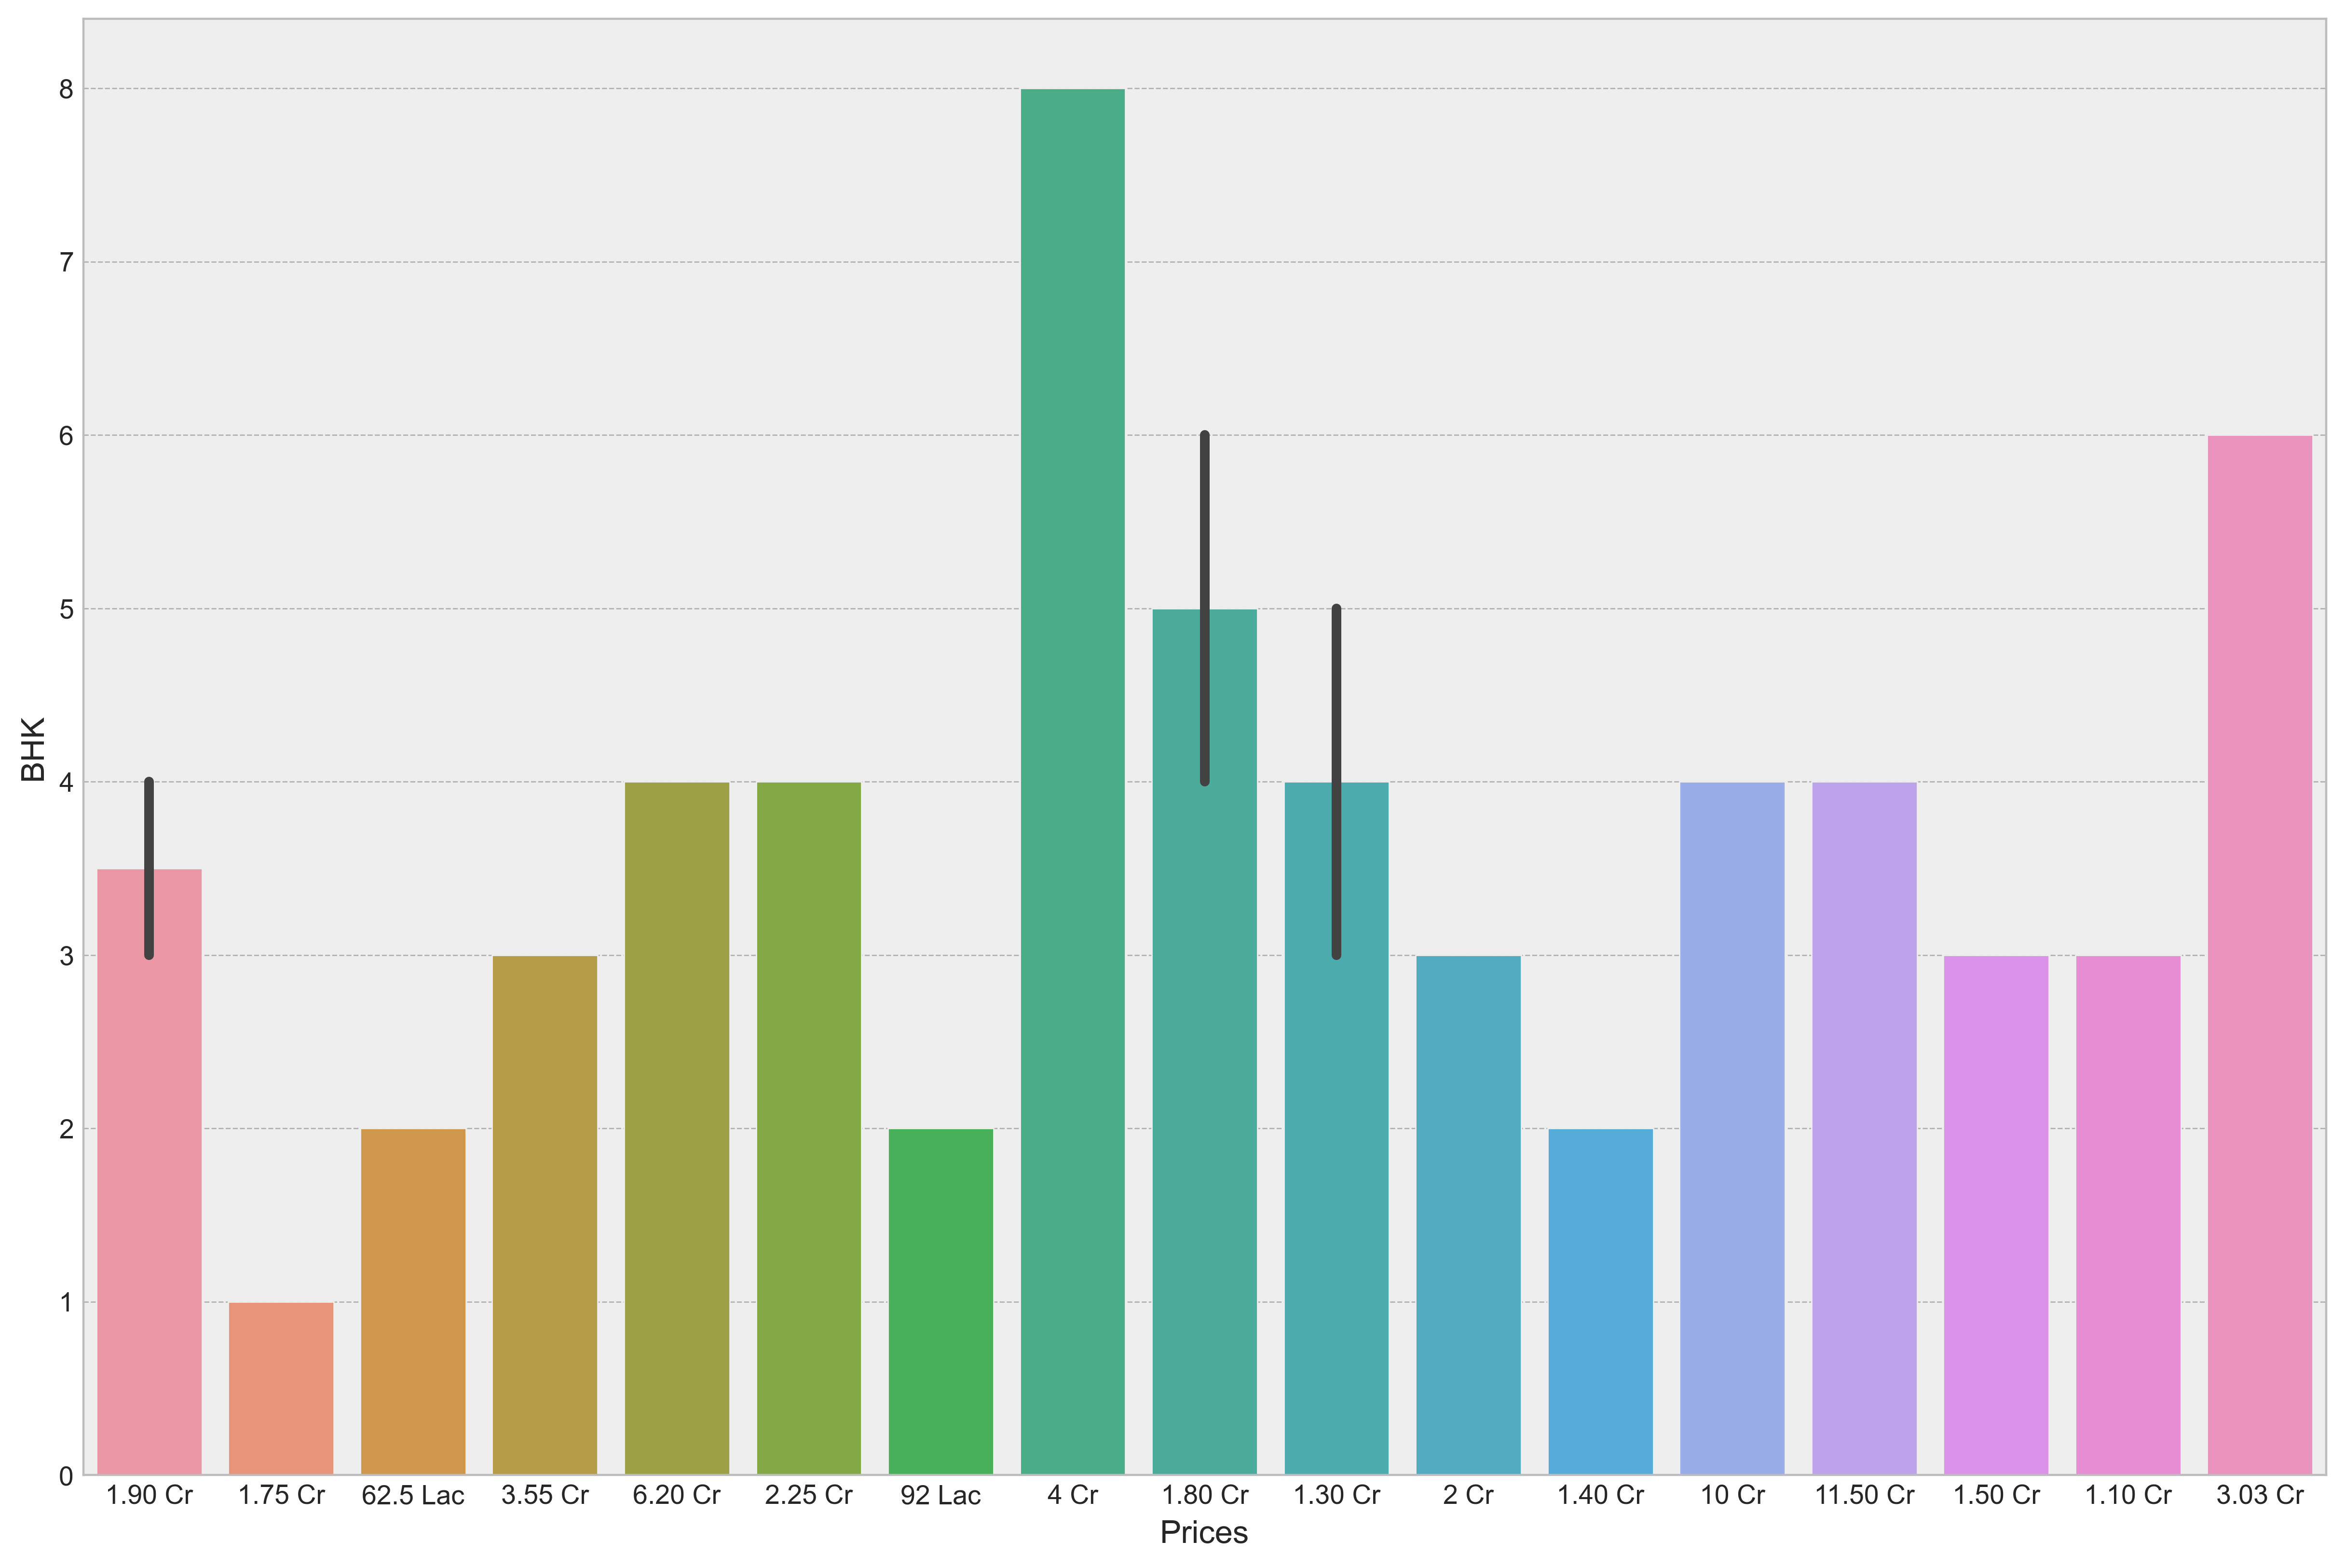

In [86]:
plt.figure(figsize=(15,10), dpi = 200)
sns.barplot(data = df.head(20), x = 'Prices', y = 'BHK');

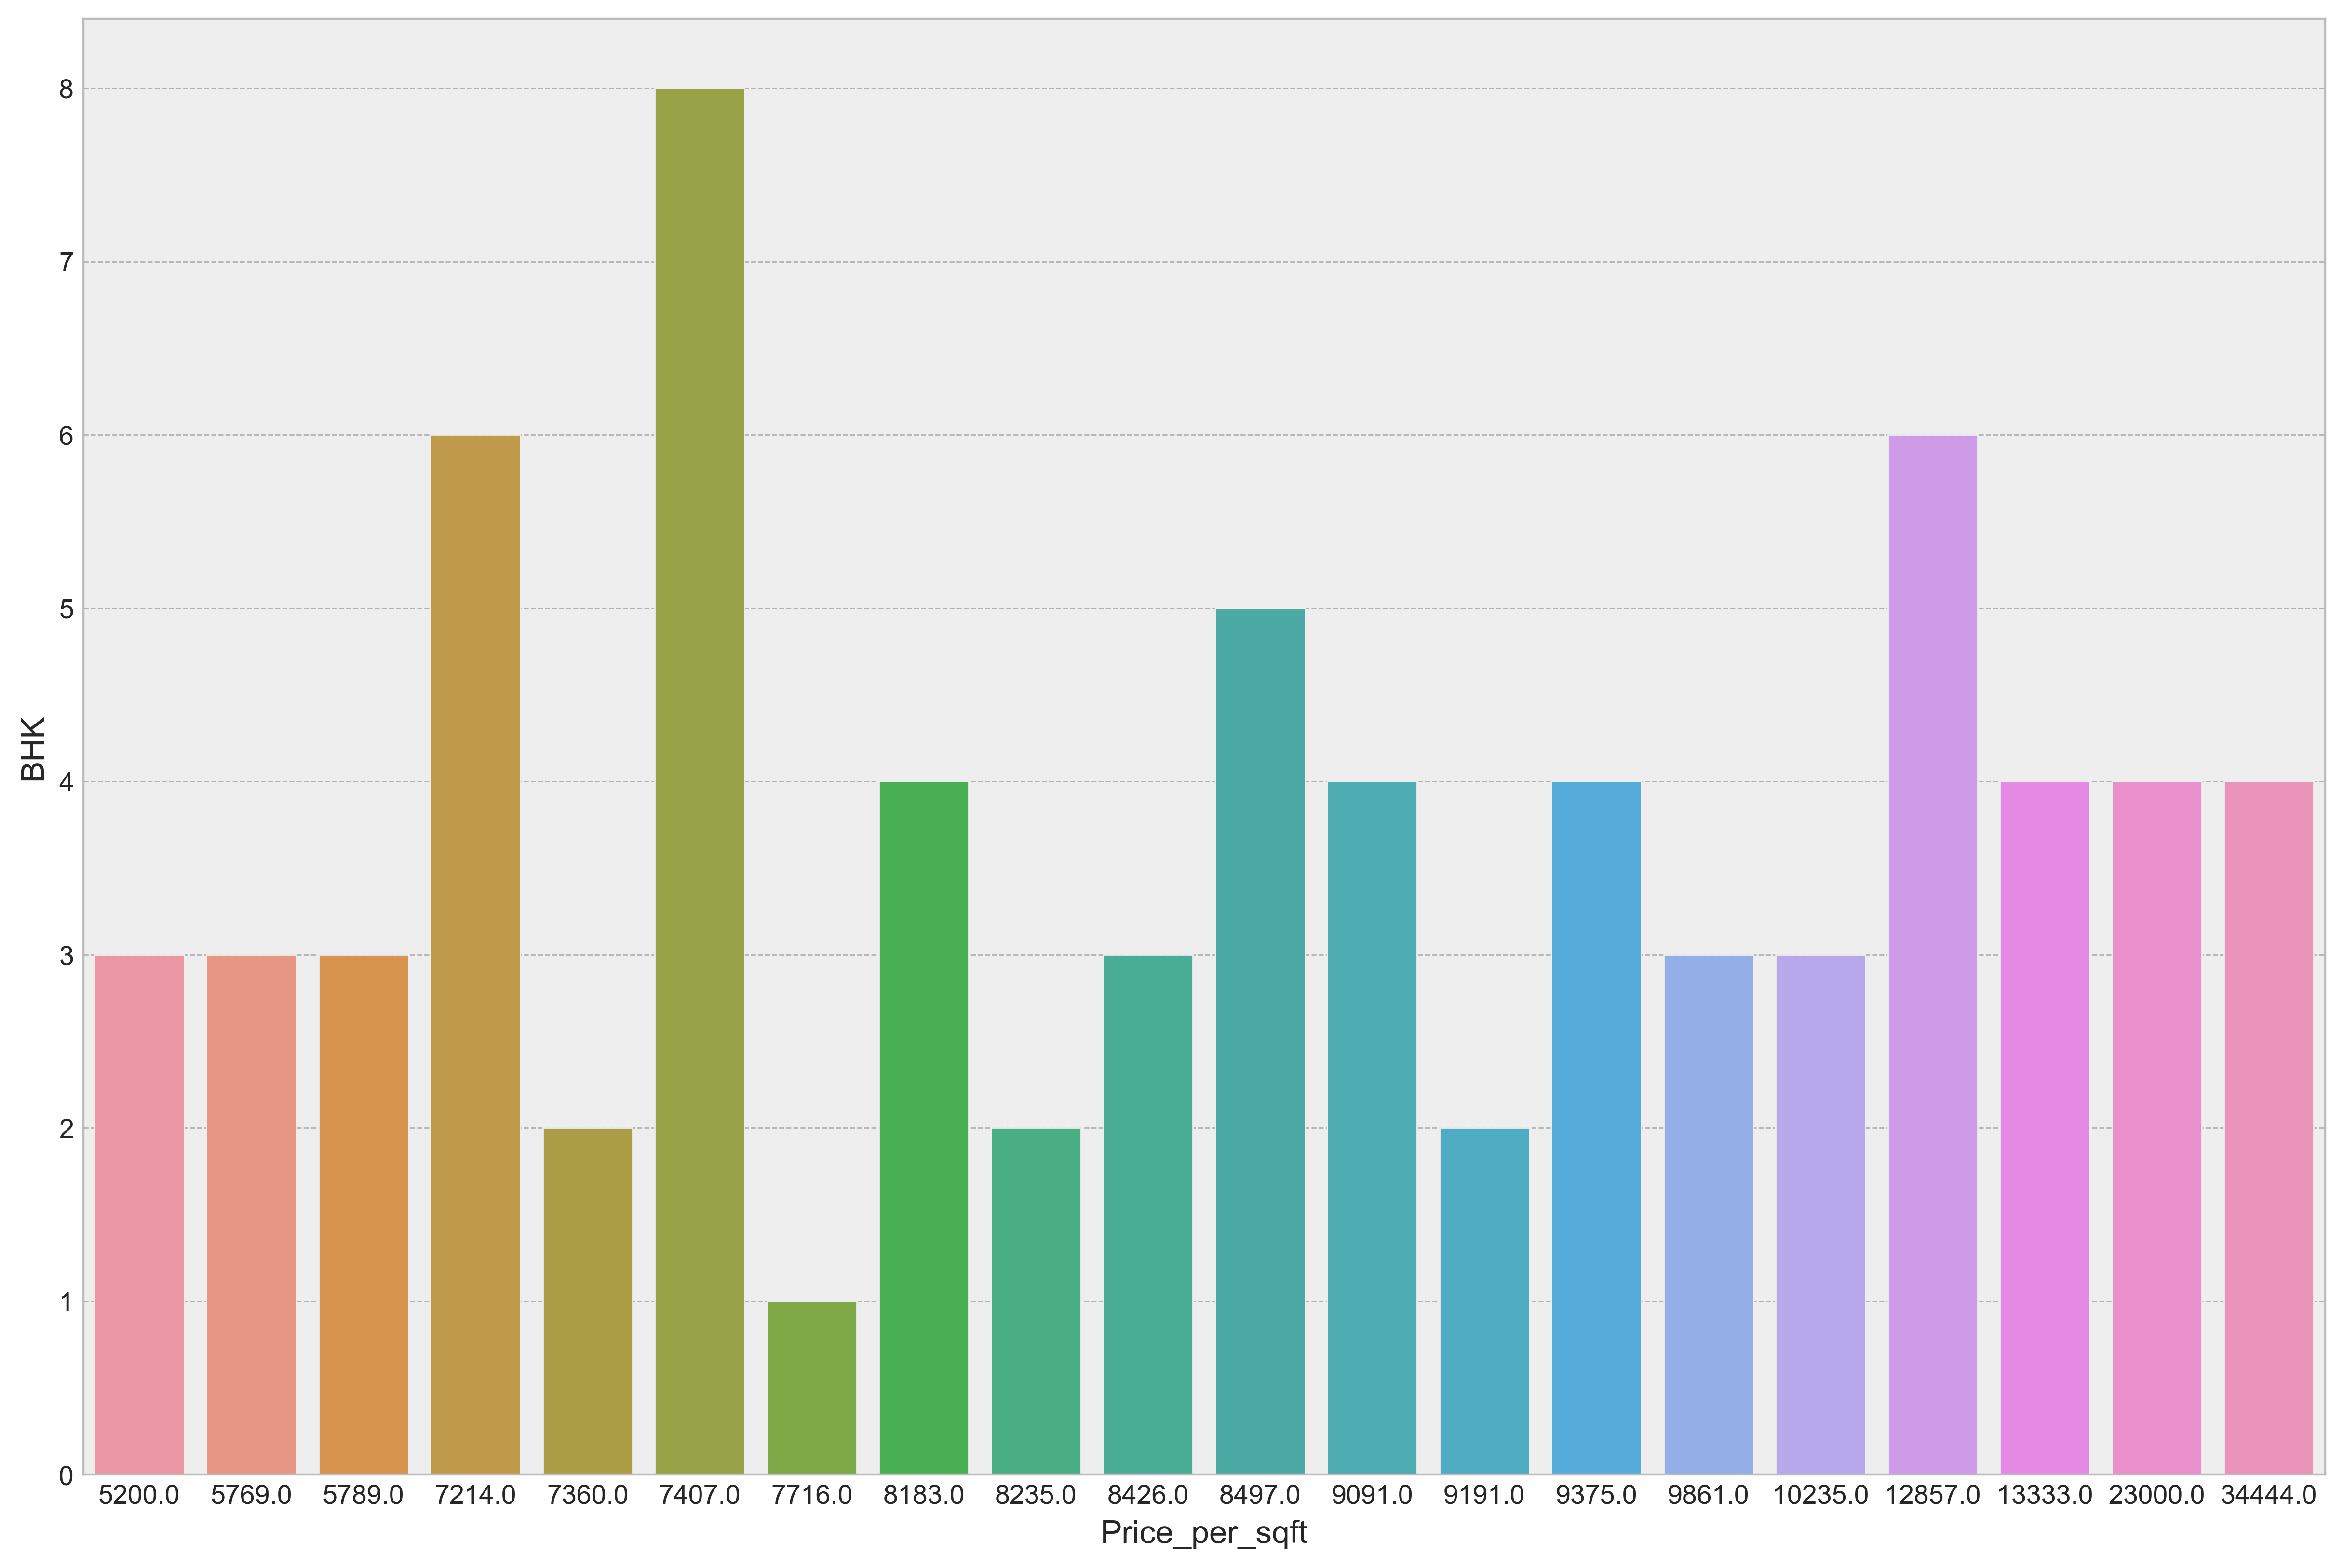

In [87]:
plt.figure(figsize=(15,10), dpi = 200)
sns.barplot(data = df.head(20), x = 'Price_per_sqft', y = 'BHK');

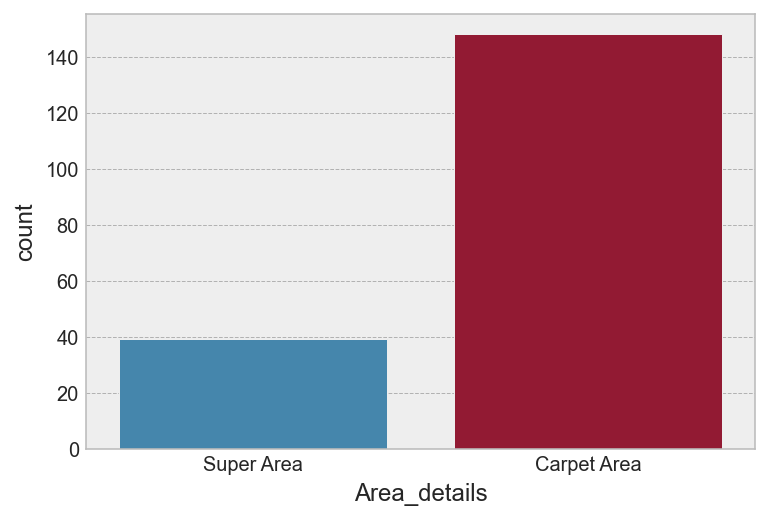

In [88]:
sns.countplot(x ='Area_details', data = df);

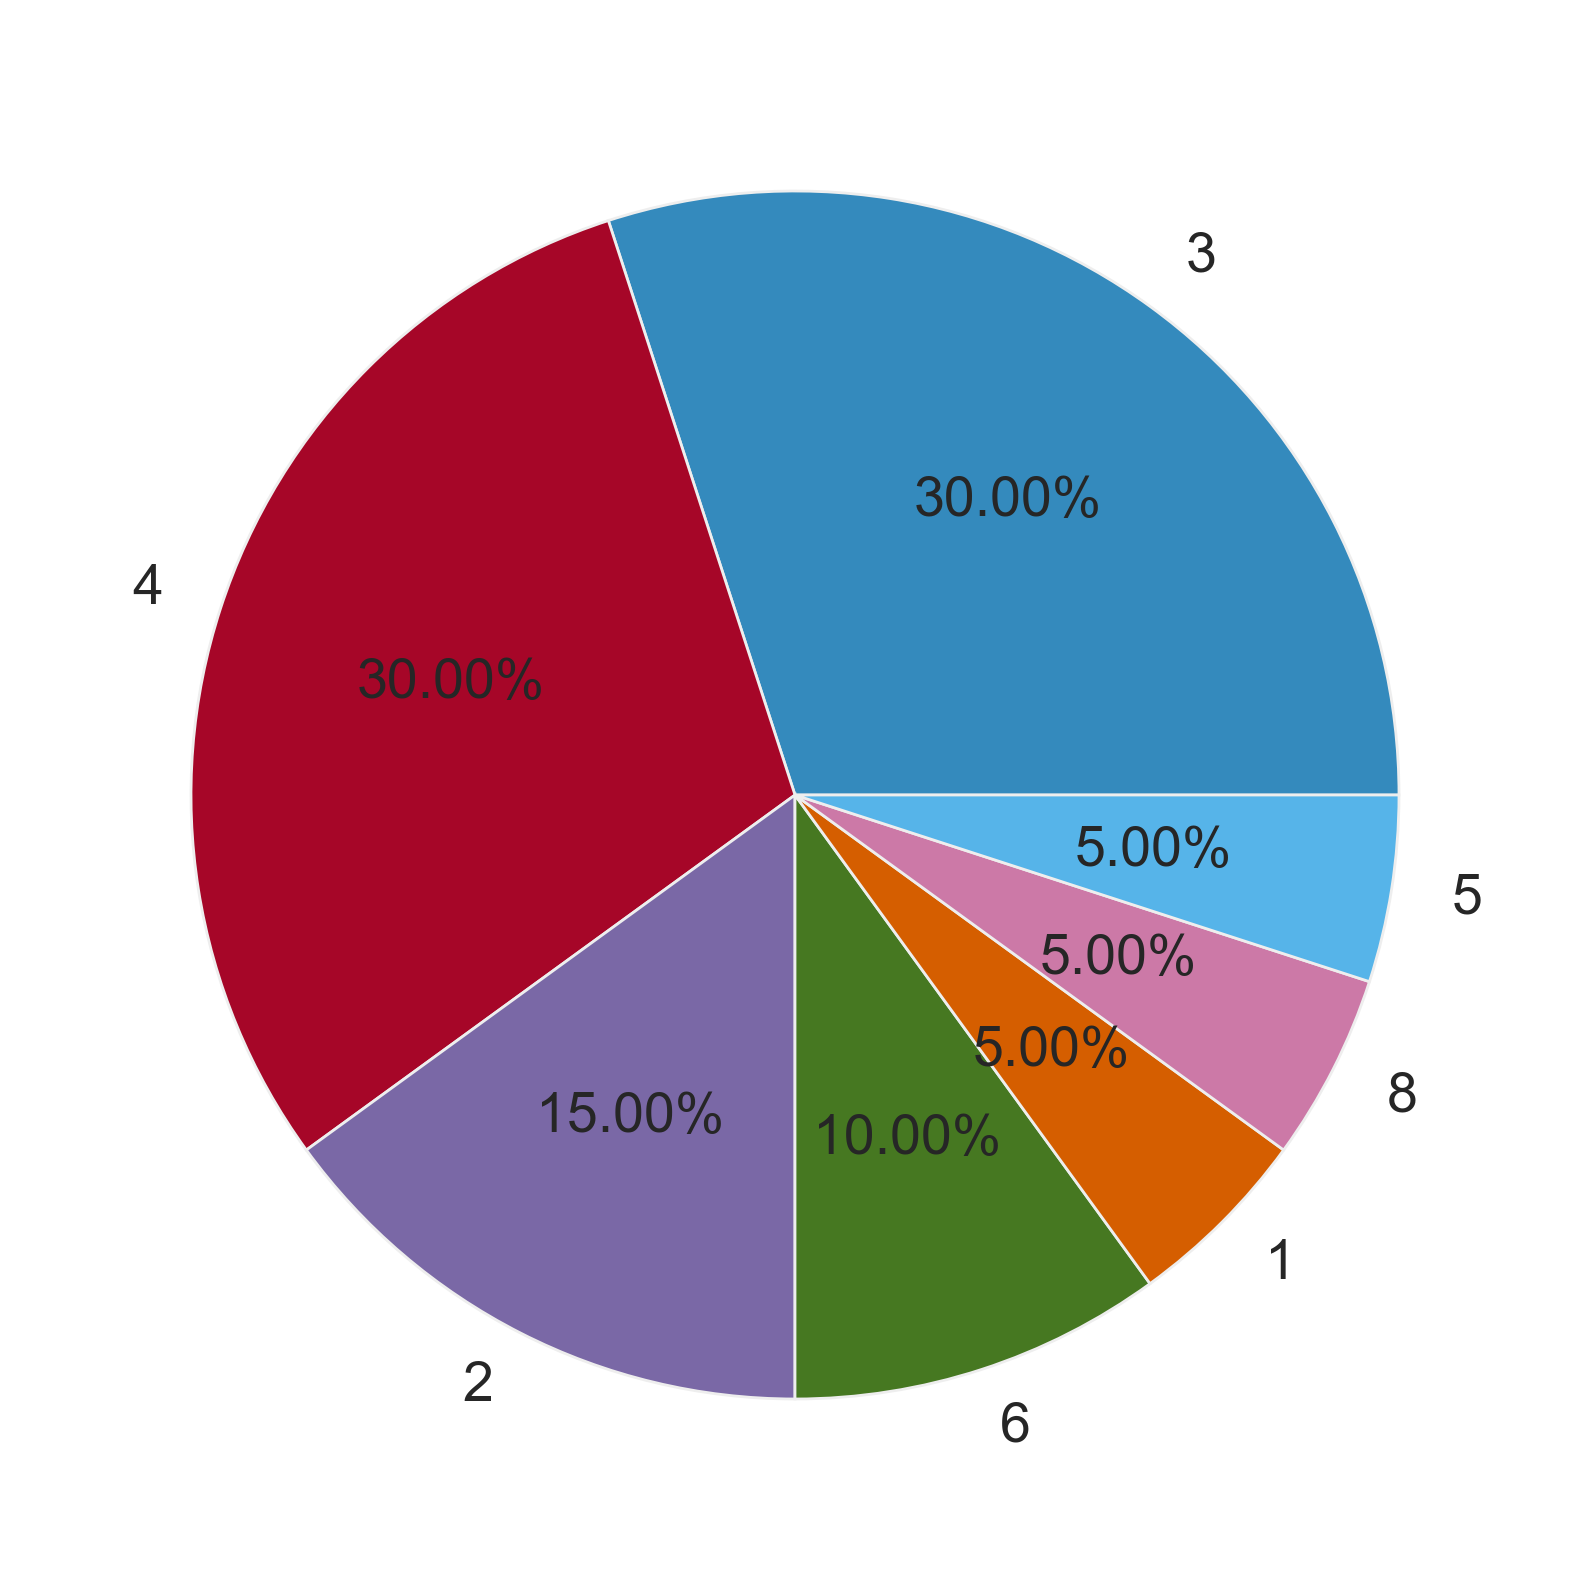

In [89]:
plt.figure(figsize=(10,5), dpi = 200)
plt.pie(x = df.BHK.head(20).value_counts().values,
       labels = df.BHK.head(20).value_counts().index,
       autopct = '%.2f%%');

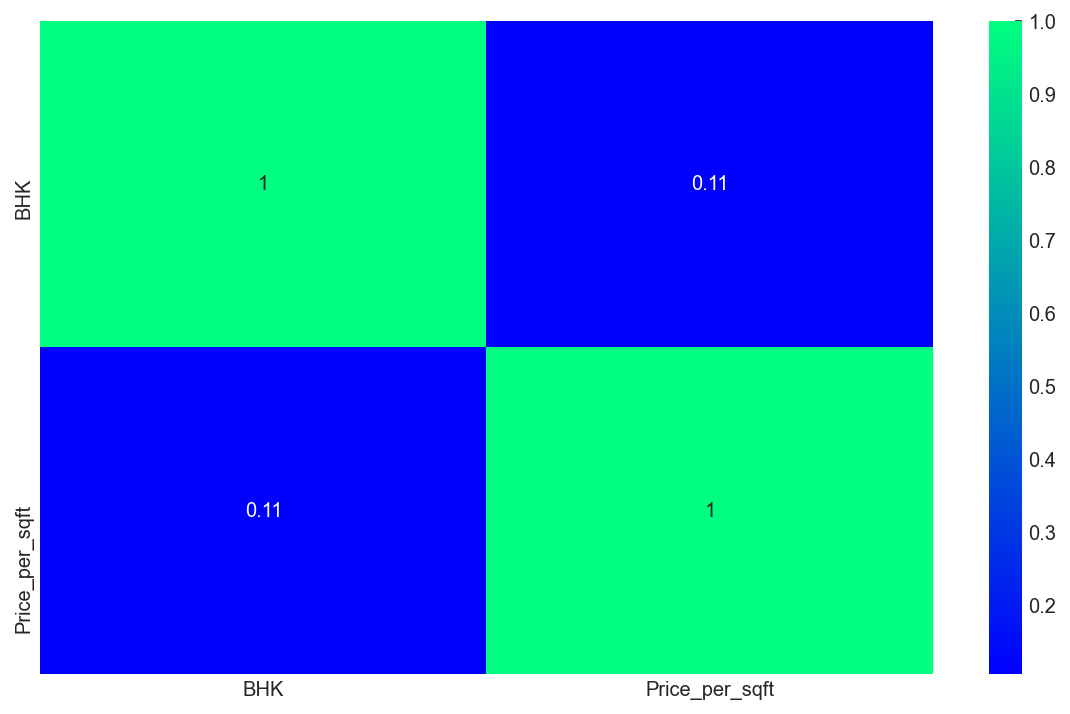

In [90]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap = 'winter', annot=True);

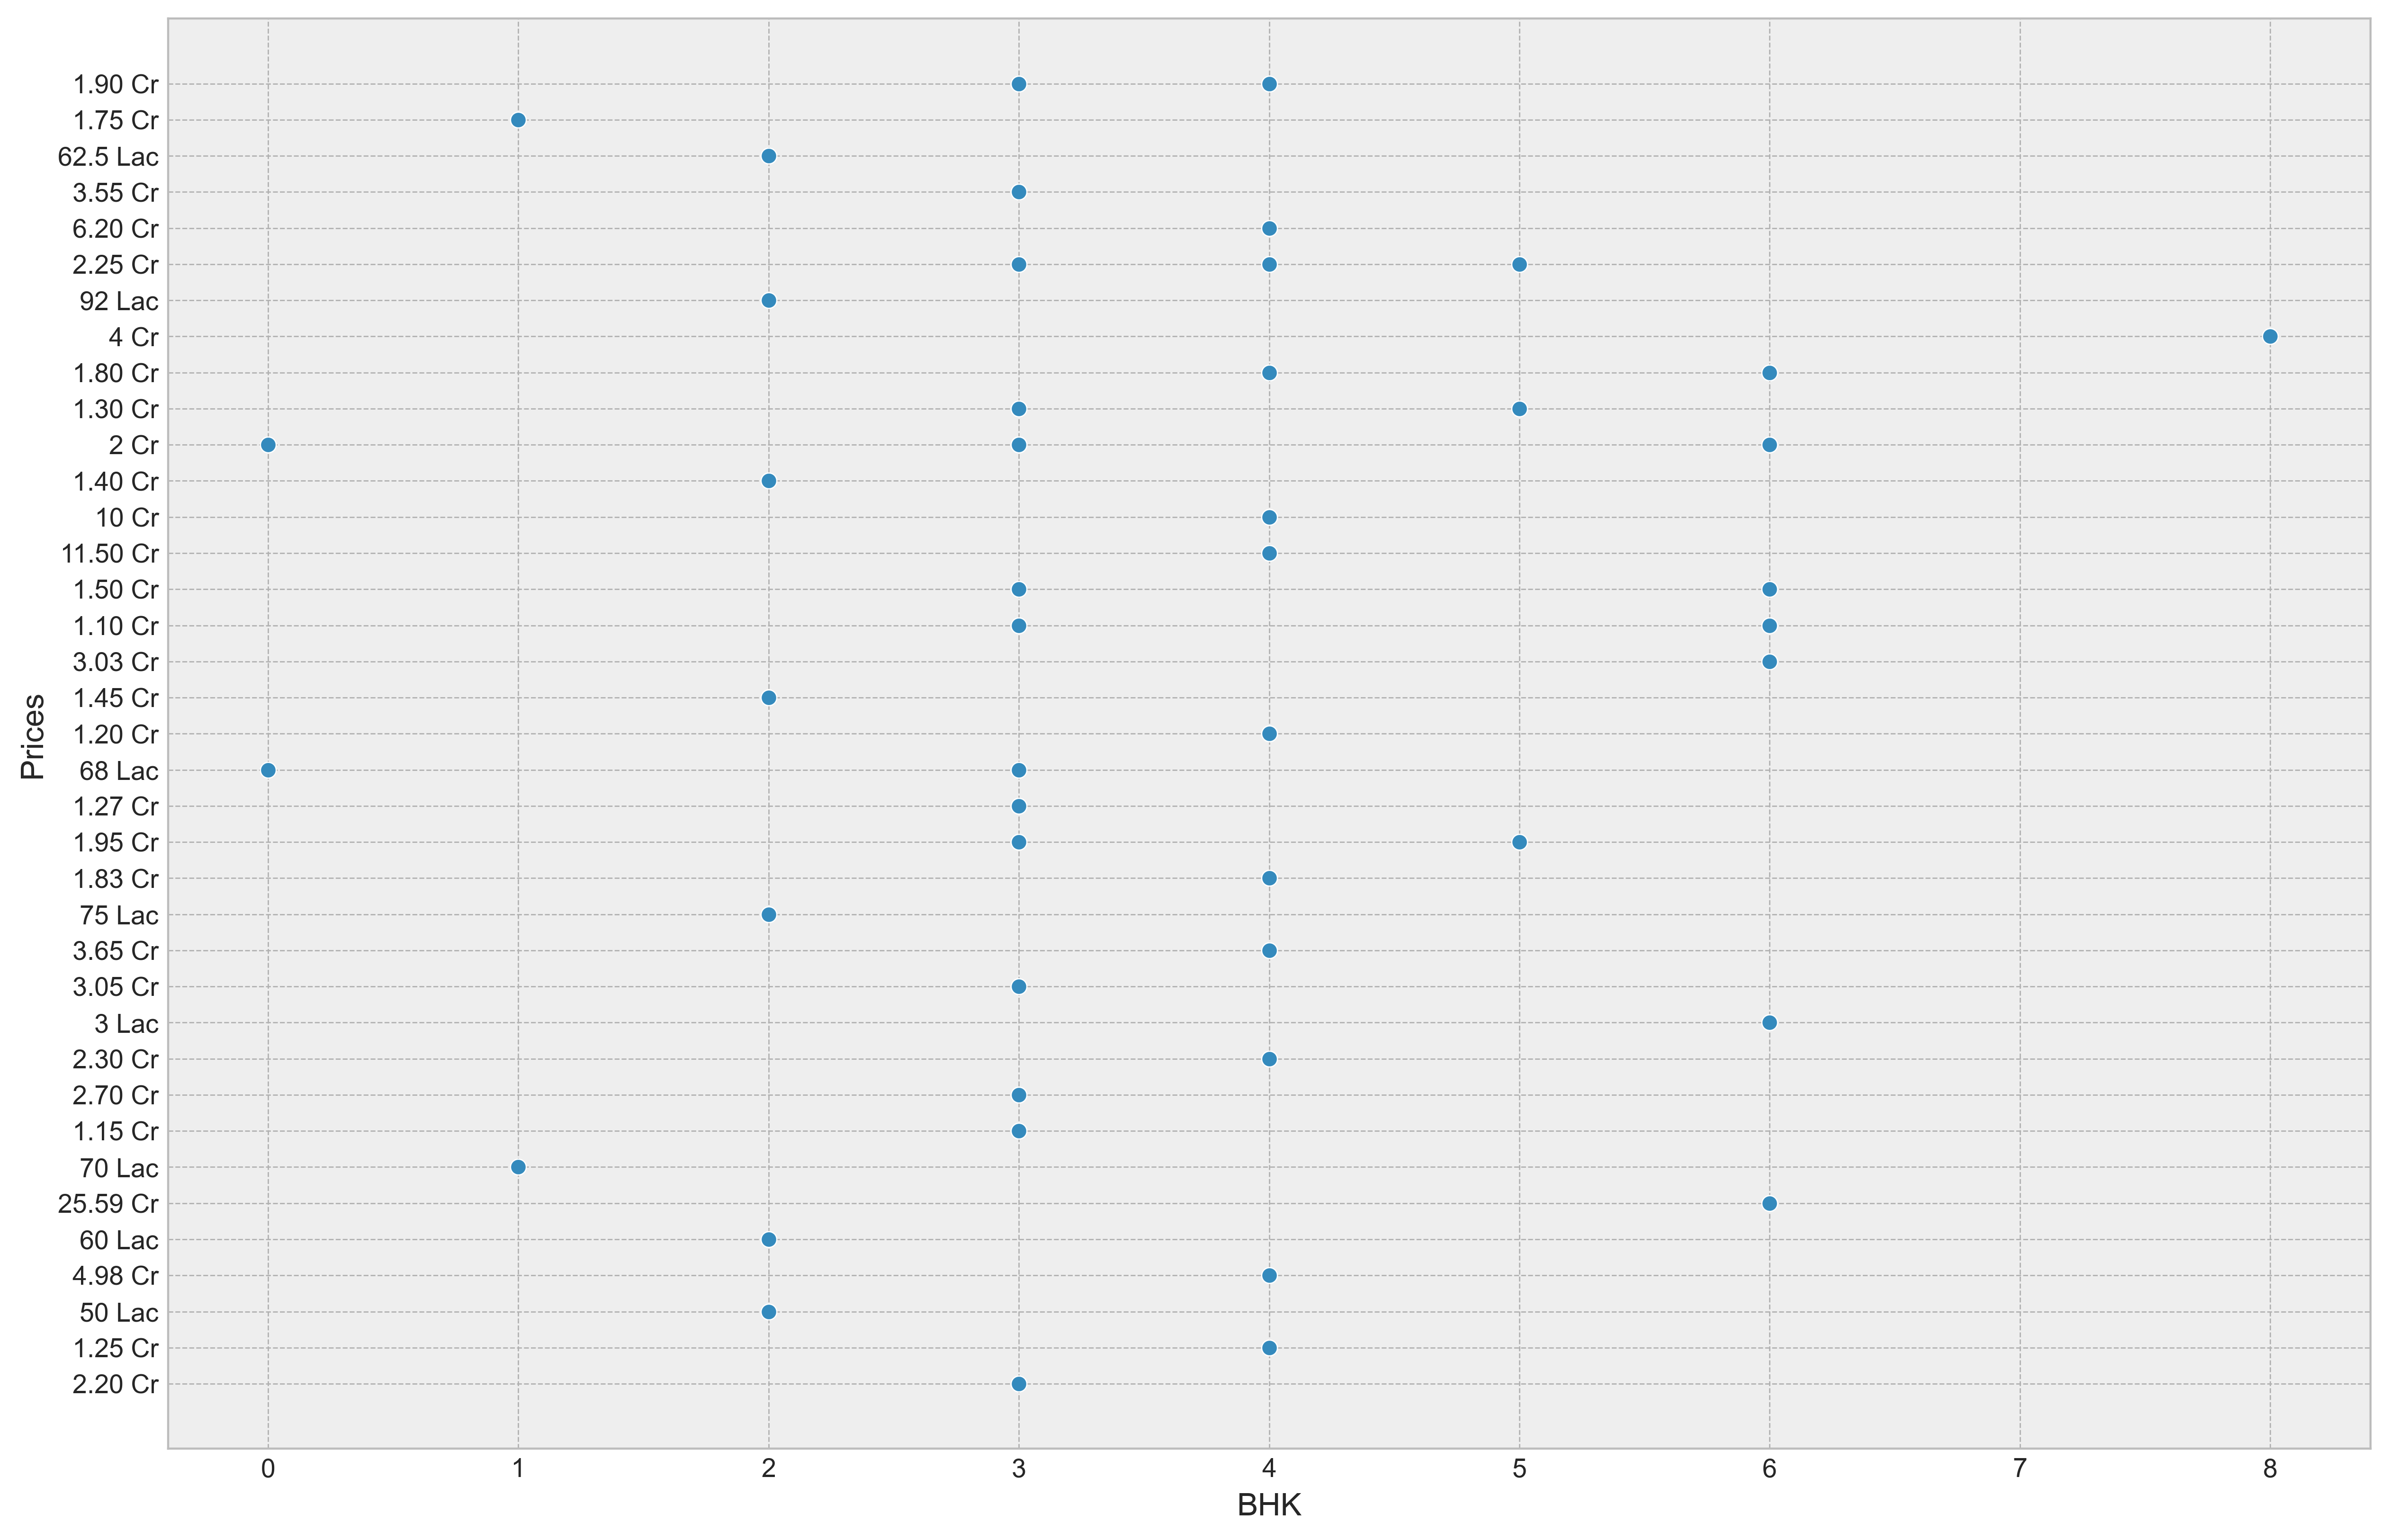

In [91]:
plt.figure(figsize=(15,10), dpi = 200)
sns.scatterplot(data = df.head(50), x = 'BHK', y = 'Prices');

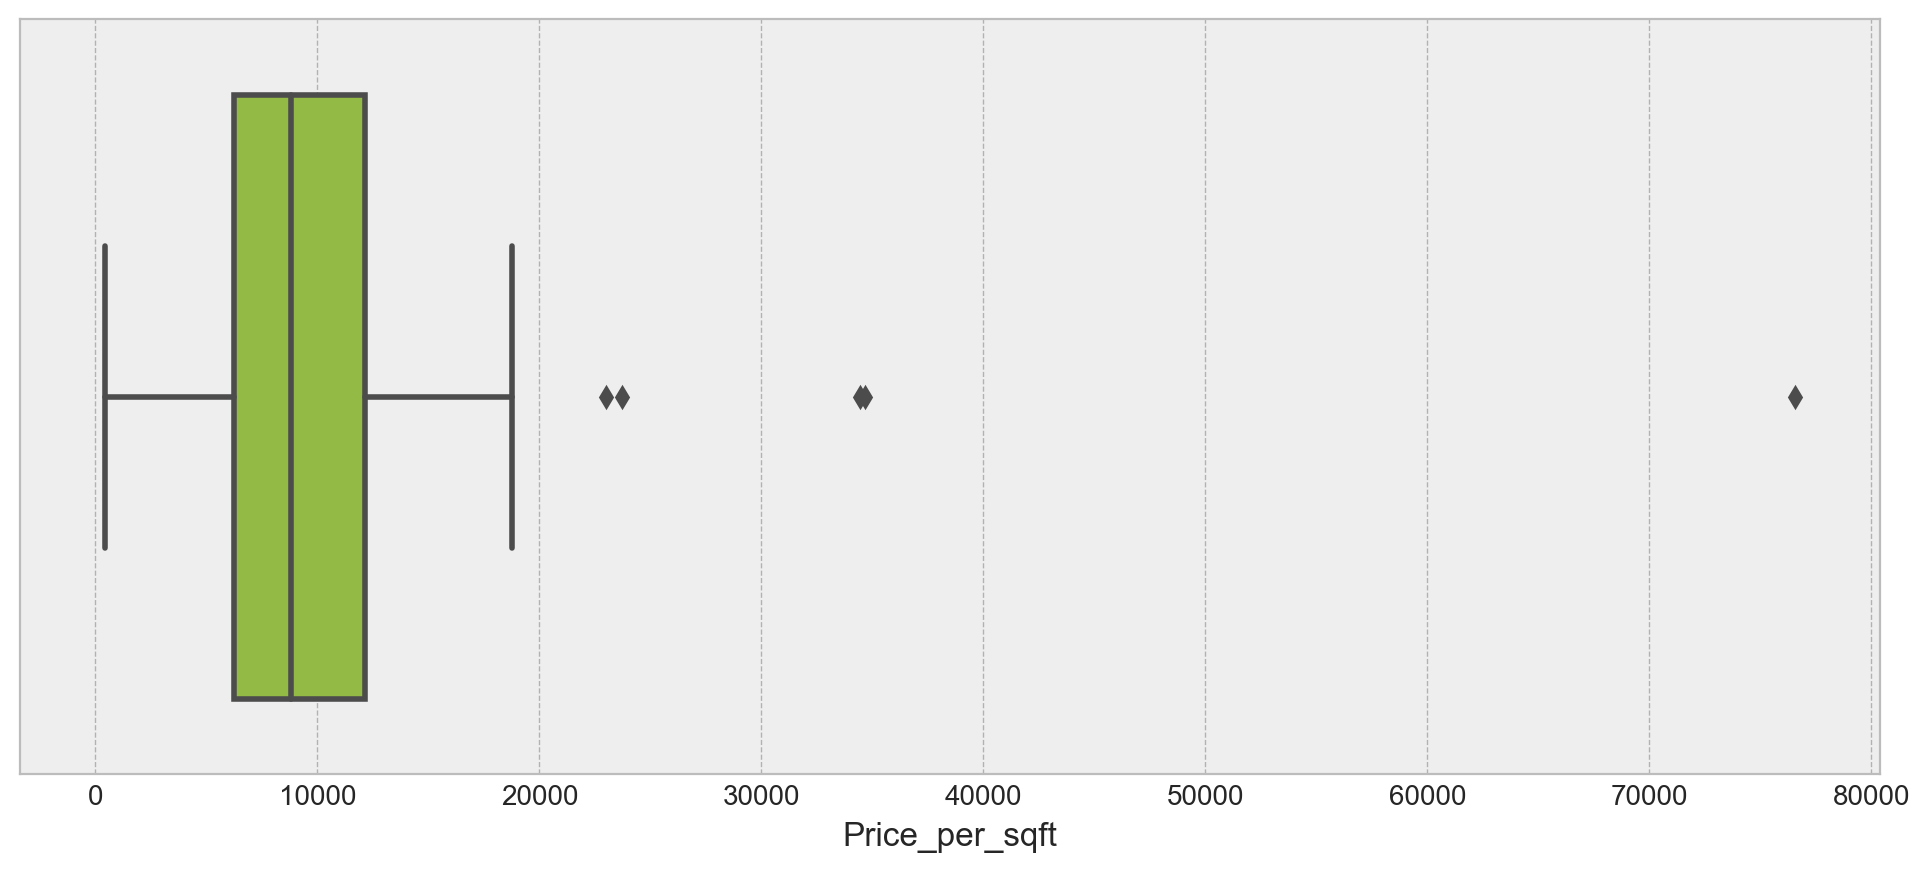

In [92]:
plt.figure(figsize=(12,5), dpi = 100)
sns.boxplot(data = df, x = 'Price_per_sqft', color = 'yellowgreen');

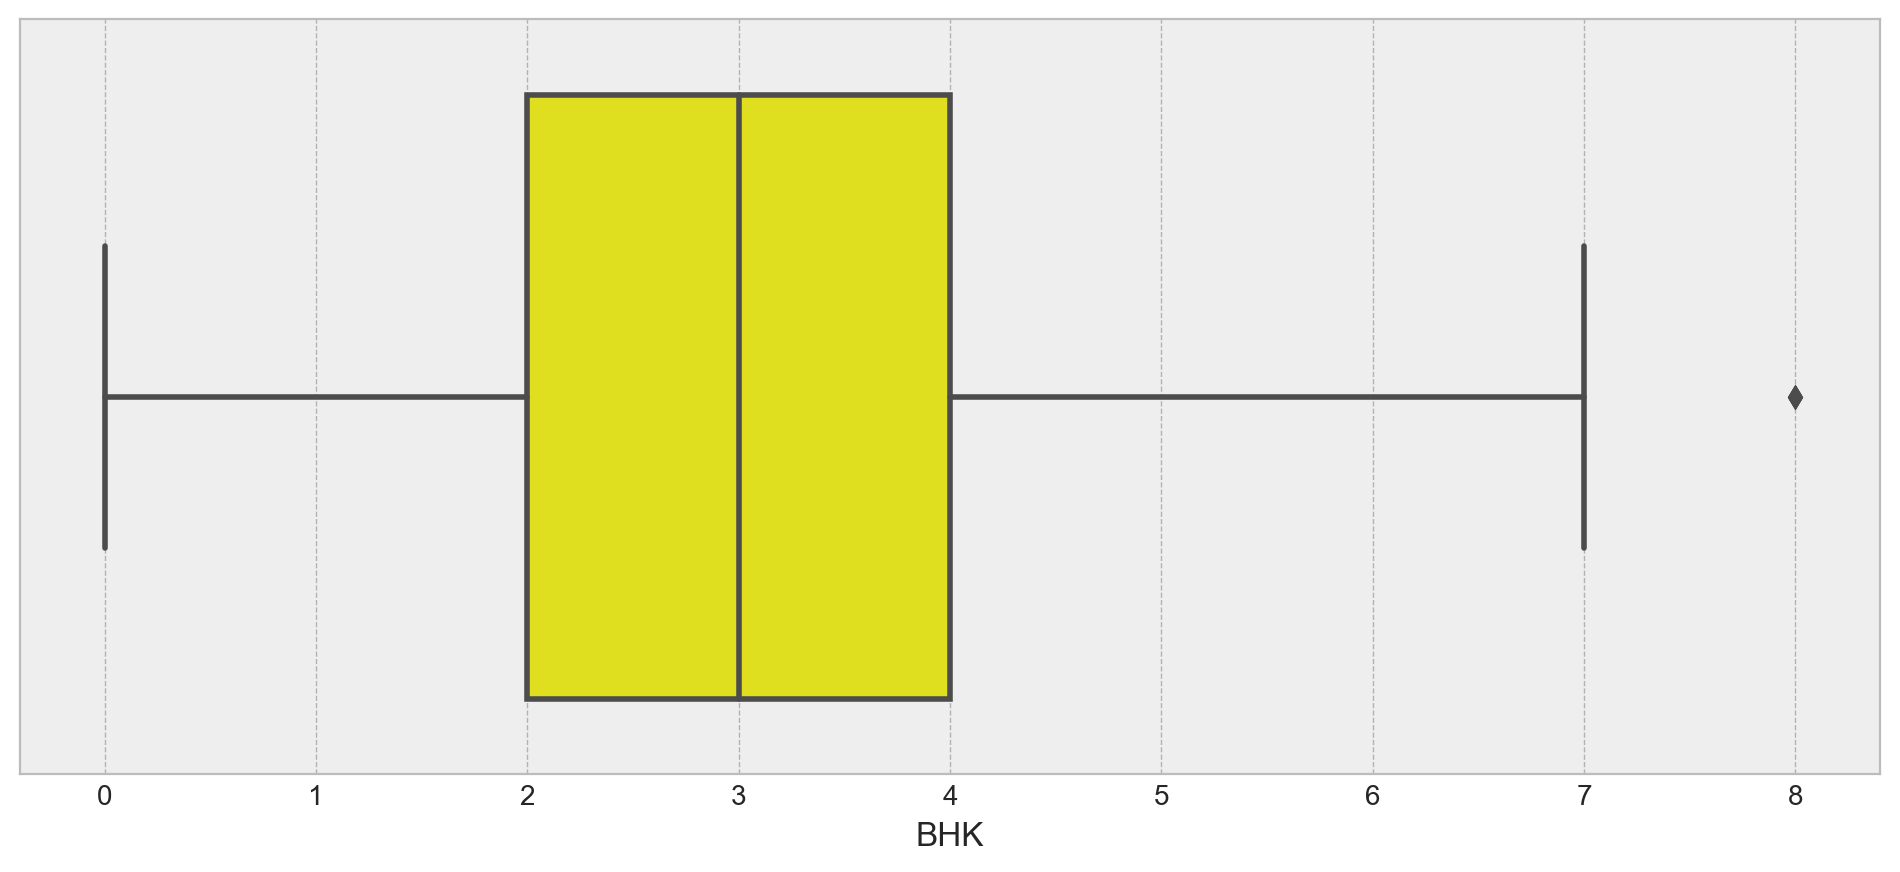

In [93]:
plt.figure(figsize=(12,5), dpi = 100)
sns.boxplot(data = df, x = 'BHK', color = 'yellow');

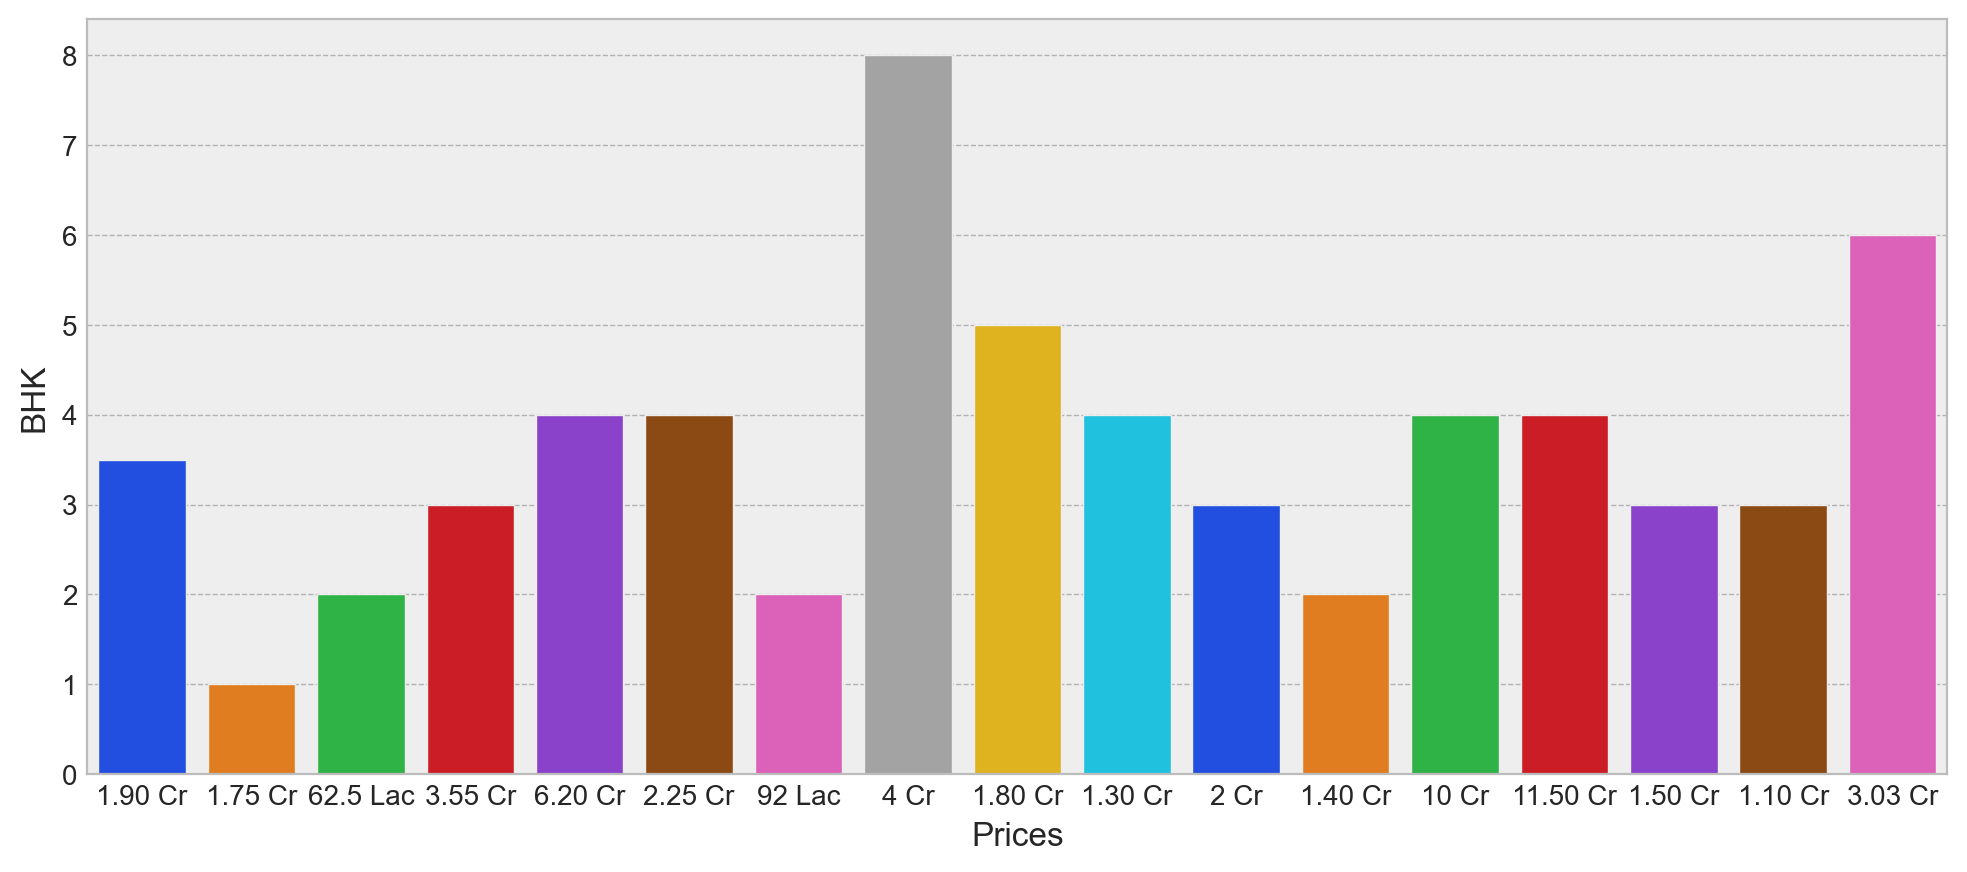

In [94]:
plt.figure(figsize=(12,5), dpi = 100)
sns.barplot(data = df.head(20), x = 'Prices', y = 'BHK', ci = None, palette='bright');

<Figure size 1200x800 with 0 Axes>

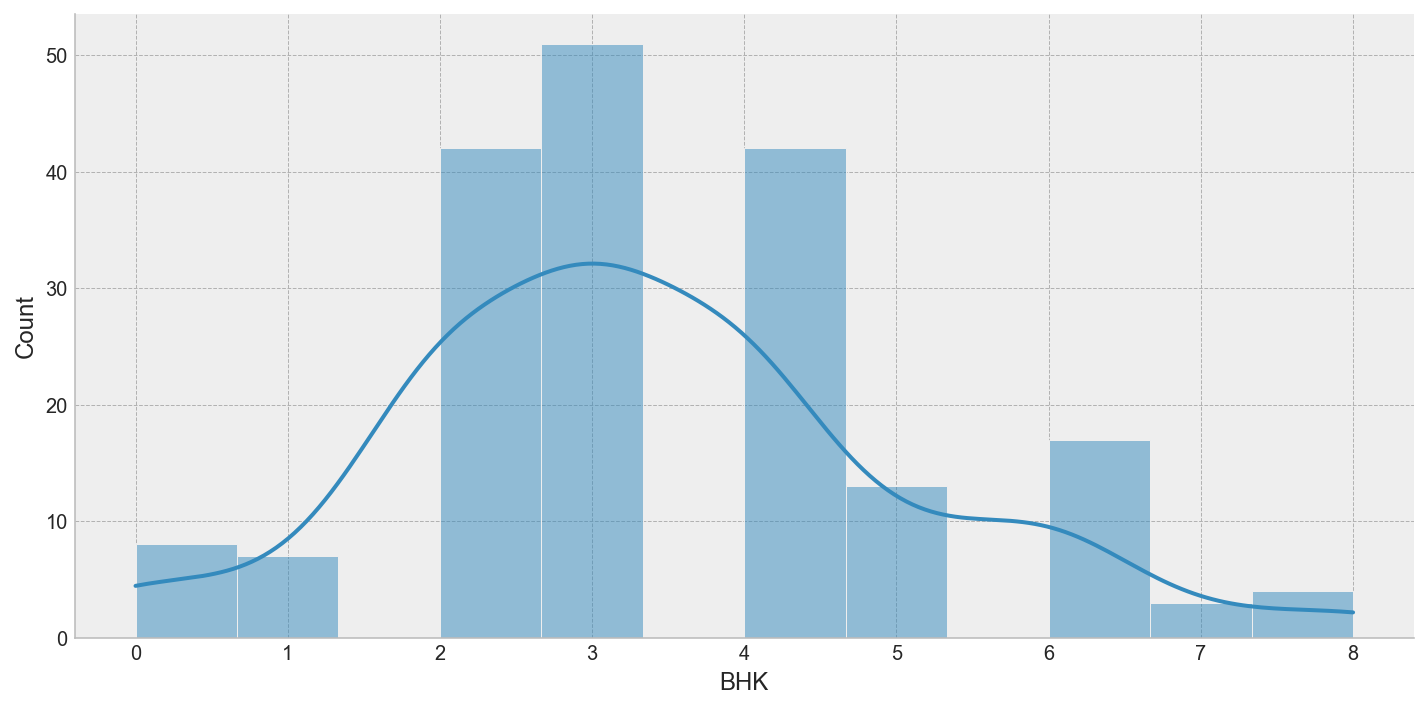

In [95]:
plt.figure(dpi = 200)
sns.displot(data = df, x = 'BHK', height = 5, aspect = 10/5,kde = True);

<Figure size 1200x800 with 0 Axes>

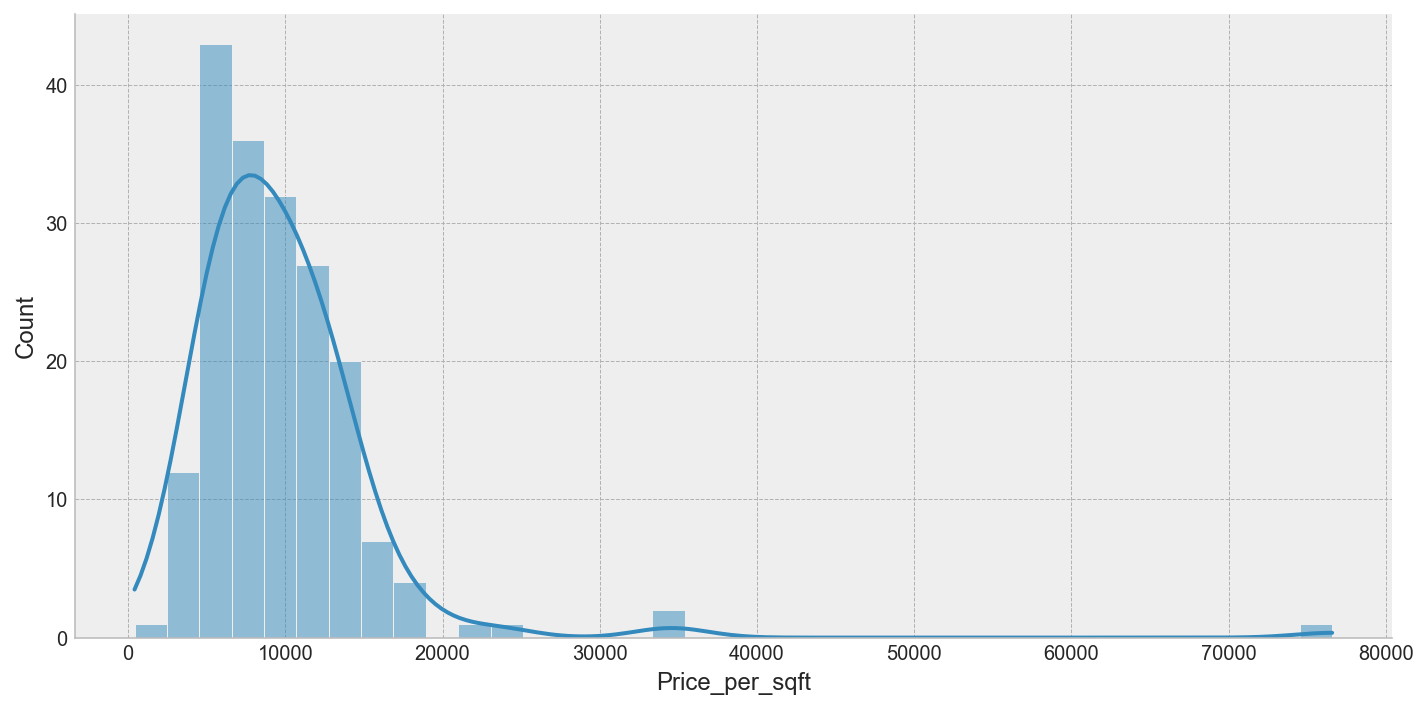

In [96]:
plt.figure(dpi = 200)
sns.displot(data = df, x = 'Price_per_sqft', height = 5, aspect = 10/5,kde = True);